In [1]:
%matplotlib inline
%config InlineBackend.figure_format='svg'
#%config InlineBackend.figure_format='retina'

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from astropy.stats import LombScargle

from scipy import integrate
import astropy
from astropy.time import Time

import pyfits
%matplotlib inline
plt.style.use('seaborn-whitegrid')


import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from astropy.stats import LombScargle
import matplotlib.ticker as ticker

In [2]:
data=pd.read_csv('/Users/brettlv/blog/IHEP_sync/file_to_mac/data/J1422+3223.csv')

In [3]:
data

,# mjd,flux,flux err
0,54908.348518,0.259720,0.005288
1,54911.343021,0.247618,0.015610
2,54914.310475,0.259331,0.015640
3,54917.309363,0.257311,0.022709
4,54921.300660,0.252513,0.010950
5,54924.302164,0.259611,0.004770
6,54927.287812,0.256560,0.018457
7,54930.286852,0.251091,0.012180
8,54933.522465,0.247808,0.004608
9,54934.509595,0.249764,0.005497


In [12]:
t[0],t[329]

(54908.348518499995, 58292.072094900002)

In [212]:
data3c273=pd.read_csv('/Users/brettlv/blog/IHEP_sync/file_to_mac/data/3c273.csv')
data3c273time=pd.read_csv('/Users/brettlv/blog/IHEP_sync/file_to_mac/data/3c273time.csv')

In [213]:
data3c273time

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,BAND,day,month,year,TIME,OBSERV.,F(GHz),FLUX(JY),ERROR,FLUX P.I.,mon_num,hour,minute,mjd
0,0,0,0,1mm,18,Jan,2003,6:33,SMA,235.60,8.610,0.447,mgurwell,1,6,33,52657.272917
1,1,1,1,1mm,12,Feb,2003,8:58,SMA,235.92,7.270,0.391,mgurwell,2,8,58,52682.373611
2,2,2,2,1mm,21,Feb,2003,10:57,SMA,220.69,7.500,0.446,mgurwell,2,10,57,52691.456250
3,3,3,3,1mm,27,Mar,2003,0:33,SMA,237.50,5.390,0.335,mgurwell,3,0,33,52725.022917
4,4,4,4,1mm,27,Mar,2003,5:06,SMA,232.00,6.370,0.360,mgurwell,3,5,6,52725.212500
5,5,5,5,1mm,1,Apr,2003,0:08,SMA,240.00,7.580,0.512,mgurwell,4,0,8,52730.005556
6,6,6,6,1mm,7,Apr,2003,5:27,SMA,235.60,6.410,0.342,mgurwell,4,5,27,52736.227083
7,7,7,7,1mm,14,Apr,2003,4:50,SMA,240.00,5.260,0.421,mgurwell,4,4,50,52743.201389
8,8,8,8,1mm,18,Apr,2003,4:41,SMA,238.00,5.770,0.306,mgurwell,4,4,41,52747.195139
9,9,9,9,1mm,19,Apr,2003,6:35,SMA,238.00,5.960,0.300,mgurwell,4,6,35,52748.274306


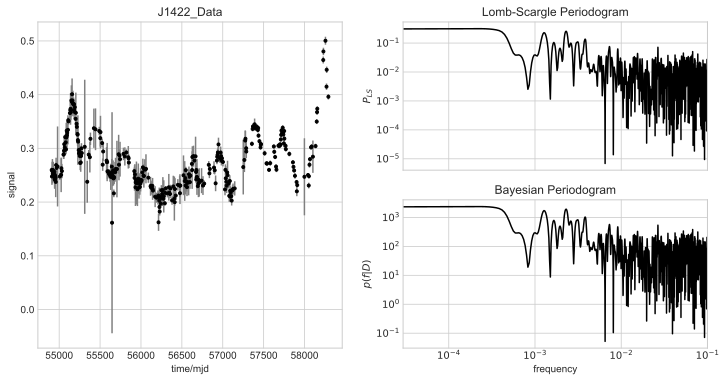

In [249]:
fig = plt.figure(figsize=(12, 6))
gs = plt.GridSpec(2, 2)

f = lambda x: 0.8 * np.sin(x)
rng = np.random.RandomState(15566)
t = data['# mjd']
dy =data['flux err']
y= data['flux']


ax = fig.add_subplot(gs[:, 0])
ax.errorbar(t, y, dy, fmt='ok', ecolor='gray',
            markersize=3, capsize=0)
#ax.plot(tfit, f(tfit), '-k', color='gray')
ax.set(xlabel='time/mjd',
       ylabel='signal',
       title='J1422_Data')

ls = LombScargle(t, y,dy)
freq, power = ls.autopower(normalization='standard',
                           minimum_frequency=0,
                           maximum_frequency=0.1,
                           samples_per_peak=10)
freq, p = ls.autopower(normalization='psd',
                       minimum_frequency=0,
                       maximum_frequency=0.1,
                       samples_per_peak=10)
#p = np.exp(p)

ax = [fig.add_subplot(gs[0, 1]),
      fig.add_subplot(gs[1, 1])]
ax[0].set_yscale('log')
ax[1].set_yscale('log')
ax[0].set_xscale('log')
ax[1].set_xscale('log')

ax[0].plot(freq, power, '-k')
ax[0].set(xlim=(0, 0.1),
          ylabel='$P_{LS}$',
          title='Lomb-Scargle Periodogram')
ax[0].xaxis.set_major_formatter(plt.NullFormatter())

ax[1].plot(freq, p, '-k')
ax[1].set(xlim=(0, 0.1),
          xlabel='frequency',
          ylabel='$p(f|D)$',
          title='Bayesian Periodogram')

fig.savefig('/Users/brettlv/blog/IHEP_sync/file_to_mac/data/j1422_bayesian_periodogram2.png',dpi=300)

In [150]:
from astropy.time import Time
from astropy.time import TimeYearDayTime
from datetime import datetime
from time import strftime,strptime
import calendar
from dateutil.parser import parse

In [115]:
day=data3c273['day']
month=data3c273['month']
year=data3c273['year']
time=data3c273['TIME']

month_number=[]
for i in month.values:
    month_number.append(strptime(i,'%b').tm_mon)
h=[]
m=[]
for i in time.values:
    h.append(i.split(":")[0])
    m.append(i.split(":")[1])
    
data3c273['mon_num']=month_number
data3c273['hour']=h
data3c273['minute']=m   

In [214]:
day=data3c273time['day']
month=data3c273time['mon_num']
year=data3c273time['year']
hour=data3c273time['hour']
minute=data3c273time['minute']

In [211]:
times=[]
for i,(d_,m_,y_,h_,mi_) in enumerate(zip(day,month,year,hour,minute)):                 
    times.append(Time(datetime(y_,m_,d_,h_,mi_,0),scale='ut1').mjd)
timesut=[]
for i,(d_,m_,y_,h_,mi_) in enumerate(zip(day,month,year,hour,minute)):                 
    timesut.append(Time(datetime(y_,m_,d_,h_,mi_,0),scale='ut1'))    
data3c273time['mjd']=times
#data3c273time.to_csv('/Users/brettlv/blog/IHEP_sync/file_to_mac/data/3c273time.csv')    

In [210]:
timesut[0],timesut[0].ut1

(<Time object: scale='ut1' format='datetime' value=2003-01-18 06:33:00>,
 <Time object: scale='ut1' format='datetime' value=2003-01-18 06:33:00>)

In [147]:
year.dtype,month.dtype,day.dtype,hour.dtype,minute.dtype

(dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'))

/Users/brettlv/anaconda3/lib/python3.6/site-packages/astropy/stats/lombscargle/implementations/fast_impl.py:93: RuntimeWarning: invalid value encountered in true_divide
  tan_2omega_tau = (S2 - 2 * S * C) / (C2 - (C * C - S * S))


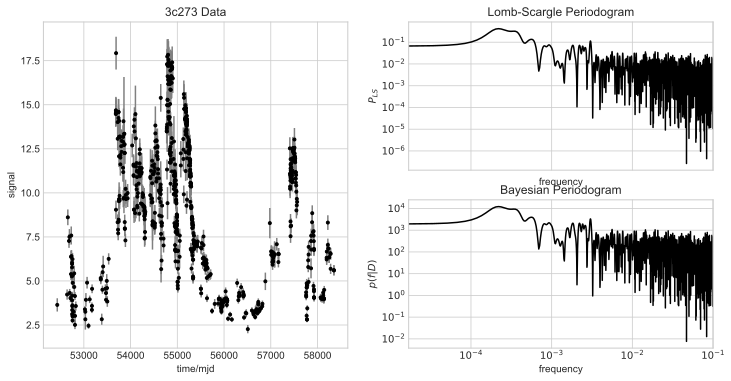

In [247]:
fig = plt.figure(figsize=(12, 6))
gs = plt.GridSpec(2, 2)

f = lambda x: 0.8 * np.sin(x)
rng = np.random.RandomState(15566)


t = times
dy =data3c273time['ERROR']
y= data3c273time['FLUX(JY)']


ax = fig.add_subplot(gs[:, 0])
ax.errorbar(t, y, dy, fmt='ok', ecolor='gray',
            markersize=3, capsize=0)
#ax.plot(tfit, f(tfit), '-k', color='gray')
ax.set(xlabel='time/mjd',
       ylabel='signal',
       title='3c273 Data')

ls = LombScargle(t, y,dy)
freq, power = ls.autopower(normalization='standard',
                           minimum_frequency=0,
                           maximum_frequency=0.1,
                           samples_per_peak=10)
freq, p = ls.autopower(normalization='psd',
                       minimum_frequency=0,
                       maximum_frequency=0.1,
                       samples_per_peak=10)
#p = np.exp(p)

ax = [fig.add_subplot(gs[0, 1]),
      fig.add_subplot(gs[1, 1])]
ax[0].set_yscale('log')
ax[1].set_yscale('log')
ax[0].set_xscale('log')
ax[1].set_xscale('log')

ax[0].plot(freq, power, '-k')
ax[0].set(xlim=(0, 0.1),
          xlabel='frequency',
          ylabel='$P_{LS}$',
          title='Lomb-Scargle Periodogram')
ax[0].xaxis.set_major_formatter(plt.NullFormatter())

ax[1].plot(freq, p, '-k')
ax[1].set(xlim=(0, 0.1),
          xlabel='frequency',
          ylabel='$p(f|D)$',
          title='Bayesian Periodogram')

fig.savefig('/Users/brettlv/blog/IHEP_sync/file_to_mac/data/3c273_bayesian_periodogram4.png',dpi=300)

In [241]:
1/0.003,1/0.0024,1/0.0014

(333.3333333333333, 416.6666666666667, 714.2857142857143)

In [2]:


def get_tj(time,count):
    tj=[]
    for j in np.arange(time.size):
        if count[j]>0:
            tj.append(time[j]) 
    tj=np.array(tj)        
    return tj

def Integrate_phi(freqref,mudot):
    return 2*np.pi*(freqref*tj+0.5*mudot*tj**2) 
   
    

def get_phal(M,freqref,mudot):
    m=int(N/M)-1
    phi=Integrate_phi(freqref,mudot)
    phal=np.arange(M)
    for l in np.arange(M):
        phil=phi[l*m:(l+1)*m]
        phal[l]=np.arctan((np.sum(np.sin(phil))+np.sum(np.sin(2*phil))+np.sum(np.sin(3*phil)))/(np.sum(np.cos(phil))+np.sum(np.cos(2*phil))+np.sum(np.cos(3*phil))))        
    return phal  

def ZetaN(freqref,mudot):
    phi=Integrate_phi(freqref,mudot) 
    #n=3
    zeta3N=(np.sum(np.cos(phi)))**2+(np.sum(np.sin(phi)))**2+(np.sum(np.cos(2*phi)))**2+(np.sum(np.sin(2*phi)))**2+(np.sum(np.cos(3*phi)))**2+(np.sum(np.sin(3*phi)))**2
    #n=2
    zeta2N=(np.sum(np.cos(phi)))**2+(np.sum(np.sin(phi)))**2+(np.sum(np.cos(2*phi)))**2+(np.sum(np.sin(2*phi)))**2
    ZetaN=zeta3N*2/N
    return ZetaN 

def chisq(M,freqref,mudot):
    phal=get_phal(M,freqref,mudot)
    #ZetaN2=ZetaN(freqref,mudot)
    chisq=(np.sum(phal**2)-np.sum(phal)**2/M)
    return chisq





In [ ]:
#plt.savefig("tmp.pdf",bbox_inches='tight')

/Users/brettlv/anaconda3/lib/python3.6/site-packages/astropy/stats/lombscargle/implementations/fast_impl.py:93: RuntimeWarning: invalid value encountered in true_divide
  tan_2omega_tau = (S2 - 2 * S * C) / (C2 - (C * C - S * S))


 (0, 1),

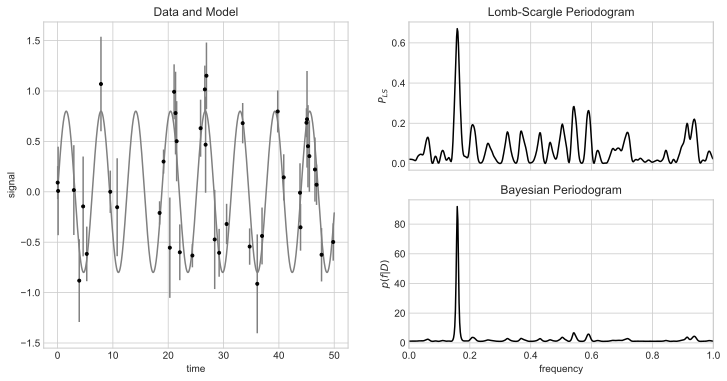

In [2]:
fig = plt.figure(figsize=(12, 6))
gs = plt.GridSpec(2, 2)

f = lambda x: 0.8 * np.sin(x)
rng = np.random.RandomState(15566)
t = 50 * rng.rand(40)
dy = 0.1 + 0.4 * rng.rand(len(t))
y = f(t) + dy * rng.randn(len(t))
tfit = np.linspace(0, 50, 1000)

ax = fig.add_subplot(gs[:, 0])
ax.errorbar(t, y, dy, fmt='ok', ecolor='gray',
            markersize=3, capsize=0)
ax.plot(tfit, f(tfit), '-k', color='gray')
ax.set(xlabel='time',
       ylabel='signal',
       title='Data and Model')

ls = LombScargle(t, y)
freq, power = ls.autopower(normalization='standard',
                           minimum_frequency=0,
                           maximum_frequency=1,
                           samples_per_peak=10)
freq, p = ls.autopower(normalization='psd',
                       minimum_frequency=0,
                       maximum_frequency=1,
                       samples_per_peak=10)
p = np.exp(p)



ax = [fig.add_subplot(gs[0, 1]),
      fig.add_subplot(gs[1, 1])]
ax[0].plot(freq, power, '-k')
ax[0].set(xlim=(0, 1),
          ylabel='$P_{LS}$',
          title='Lomb-Scargle Periodogram')
ax[0].xaxis.set_major_formatter(plt.NullFormatter())

ax[1].plot(freq, p, '-k')
ax[1].set(xlim=(0, 1),
          xlabel='frequency',
          ylabel='$p(f|D)$',
          title='Bayesian Periodogram')

#fig.savefig('fig24_bayesian_periodogram.pdf')

In [ ]:
lightcurve=pyfits.open('/Volumes/Brettlv_G_m/RX_J0806/2795/primary/src_lc_paper.fits')

In [ ]:
lightcurve=pyfits.open('/Volumes/Brettlv_G_ming/RX_J0806/2795/primary/src_lc_2795.fits')

In [ ]:
lightcurve=pyfits.open('/Volumes/Brettlv_G_ming/RX_J0806/4523/primary/src_lc_paper.fits')

In [ ]:
lightcurve=pyfits.open('/Volumes/Brettlv_G_ming/RX_J0806/4524/primary/src_lc_paper.fits')

In [ ]:
lightcurve=pyfits.open('/Volumes/Brettlv_G_ming/RX_J0806/4525/primary/src_lc_paper.fits')

In [ ]:
lightcurve=pyfits.open('/Volumes/Brettlv_G_ming/RX_J0806/4526/primary/src_lc_paper.fits')

In [ ]:
lightcurve=pyfits.open('/Volumes/Brettlv_G_ming/RX_J0806/4527/primary/src_lc_paper.fits')

In [ ]:
lightcurve=pyfits.open('/Volumes/Brettlv_G_ming/RX_J0806/5282/primary/src_lc_paper.fits')

In [ ]:
lightcurve=pyfits.open('/Volumes/Brettlv_G_ming/RX_J0806/6562/primary/src_lc_paper.fits')

In [ ]:
lightcurve=pyfits.open('/Volumes/Brettlv_G_ming/RX_J0806/7249/primary/src_lc_paper.fits')

In [ ]:
lightcurve=pyfits.open('/Volumes/Brettlv_G_ming/RX_J0806/11027/primary/src_lc_paper.fits')

In [ ]:
lightcurve=pyfits.open('/Volumes/Brettlv_G_ming/RX_J0806/11028/primary/src_lc_paper.fits')

In [ ]:
lightcurve=pyfits.open('/Volumes/Brettlv_G_ming/RX_J0806/12060/primary/src_lc_paper.fits')

In [ ]:
lightcurve=pyfits.open('/Volumes/Brettlv_G_ming/RX_J0806/12061/primary/src_lc_paper.fits')

In [ ]:
lightcurve=pyfits.open('/Volumes/Brettlv_G_m/RX_J0806/xmm/0784670101/pn_lccor_0.3-2keV.lc')
data=lightcurve[1].data
gti=lightcurve[2].data
time=data['TIME']
counts=data['COUNT_RATE']
err=data['COUNT_RATE_ERR']
start=gti['START']
end=gti['STOP']


In [ ]:
time.shape,start[0],end[0],end[0]-start[0]

In [ ]:
start

In [ ]:
startnum,endnum=getgti(time,start[0],end[0])
t=time[startnum:endnum]
y=counts[startnum:endnum]
dy=err[startnum:endnum]

In [3]:
#xmm L_S
#lightcurve=pyfits.open('/Volumes/Brettlv_G_m/RX_J0806/xmm/0784670101/pn_lccor_0.3-2keV.lc')
lightcurve=pyfits.open('/Users/brettlv/RXJ0806_local/0150800101/pn_lccor_0.3-2keV.lc')
data=lightcurve[1].data
time=data['TIME']
counts=data['RATE']
err=data['ERROR']
t=time-time[0]
y=counts
dy=err

FileNotFoundError: [Errno 2] No such file or directory: '/Users/brettlv/RXJ0806_local/0150800101/pn_lccor_0.3-2keV.lc'

In [ ]:
t[1]-t[0]

In [ ]:
t.size,y.size

In [ ]:
plt.plot(t,y)

In [ ]:
fig = plt.figure(figsize=(24, 12))
gs = plt.GridSpec(2, 2)

ax = fig.add_subplot(gs[:, 0])
#ax.errorbar(t, y, dy, fmt='ok', ecolor='gray',markersize=3, capsize=0)
ax.plot(t, y, '-k', color='gray')
ax.set(xlabel='time',
       ylabel='signal',
       title='Data and Model')

ls = LombScargle(t, y)
freq, power = ls.autopower(normalization='standard',
                           minimum_frequency=0.000000001,
                           maximum_frequency=0.01,
                           samples_per_peak=10)
freq, p = ls.autopower(normalization='psd',
                       minimum_frequency=0,
                       maximum_frequency=0.01,
                       samples_per_peak=10)
p = np.exp(p)



ax = [fig.add_subplot(gs[0, 1]),
      fig.add_subplot(gs[1, 1])]
ax[0].plot(freq, power, '-k')
ax[0].set(xlim=(0.002, 0.005),
          ylabel='$P_{LS}$',
          title='Lomb-Scargle Periodogram')
ax[0].xaxis.set_major_formatter(plt.NullFormatter())

ax[1].plot(freq, p, '-k')
ax[1].set(xlim=(0.002, 0.005),
          xlabel='frequency',
          ylabel='$p(f|D)$',
          title='Bayesian Periodogram')


In [ ]:
p_range=p[1:10000]
frequency=freq[np.argmax(p_range)]
T=1/frequency
print(frequency,T)

In [ ]:
start,end

In [ ]:
counts[10:20],err[10:20]

In [ ]:
plt.plot(time,counts)

In [ ]:
c_p=counts[40:350]
t_p=(time[40:350]-time[40])

plt.plot(t_p,c_p)
#plt.xlim(start,end)

In [ ]:
fig = plt.figure(figsize=(24, 12))
gs = plt.GridSpec(2, 2)

tfit = np.linspace(t_p[0], t_p[-1], 1000)
ax = fig.add_subplot(gs[:, 0])
#ax.errorbar(t, y, dy, fmt='ok', ecolor='gray',markersize=3, capsize=0)
ax.plot(t_p, c_p, '-k', color='gray')
ax.set(xlabel='time',
       ylabel='signal',
       title='Data and Model')

ls = LombScargle(t_p, c_p)
freq, power = ls.autopower(normalization='standard',
                           minimum_frequency=0,
                           maximum_frequency=0.01,
                           samples_per_peak=10)
freq, p = ls.autopower(normalization='psd',
                       minimum_frequency=0,
                       maximum_frequency=0.01,
                       samples_per_peak=10)
p = np.exp(p)



ax = [fig.add_subplot(gs[0, 1]),
      fig.add_subplot(gs[1, 1])]
ax[0].plot(freq, power, '-k')
ax[0].set(xlim=(0.003, 0.004),
          ylabel='$P_{LS}$',
          title='Lomb-Scargle Periodogram')
ax[0].xaxis.set_major_formatter(plt.NullFormatter())

ax[1].plot(freq, p, '-k')
ax[1].set(xlim=(0.003, 0.004),
          xlabel='frequency',
          ylabel='$p(f|D)$',
          title='Bayesian Periodogram')


In [ ]:
1/321.5

In [ ]:
p_range=p[1:10000]
frequency=freq[np.argmax(p_range)+1]
T=1/frequency
print(frequency,T)

In [2]:
import astropy
from astropy.time import Time
#Single chandra barycorrected
num=4524 #4523 4524 4525...
#FOR chandra default bin time=16s
lightcurve=pyfits.open('/Volumes/Brettlv_G_m/RX_J0806/%s/repro/RXJ0806_lc.fits'%num)
#lightcurve=pyfits.open('/Volumes/Brettlv_G_m/RX_J0806/%s/repro/RXJ0806_lc_bindot01.fits'%num)
#lightcurve=pyfits.open('/Volumes/Brettlv_G_m/RX_J0806/%s/repro/RXJ0806_lc_bindot1.fits'%num)
#lightcurve=pyfits.open('/Volumes/Brettlv_G_m/RX_J0806/%s/repro/RXJ0806_lc_bin32.fits'%num)

mjdzero=lightcurve[1].header['MJDREF']
DATA_OBS=lightcurve[1].header['DATE-OBS']
TIMEZERO=lightcurve[1].header['TIMEZERO']
tstart=lightcurve[1].header['TSTART']
gtistart=lightcurve[2].data['START']
gtistop=lightcurve[2].data['STOP']


# freqdata=pyfits.open('/Volumes/Brettlv_G_m/RX_J0806/%s/repro/src.power'%num)
# folddata=pyfits.open('/Volumes/Brettlv_G_m/RX_J0806/%s/repro/src.fold'%num)
# dataf=freqdata[1].data
# datap=folddata[1].data
# freq=dataf['FREQUENCY']
# period=datap['PERIOD']
# sigma_rate=datap['SIGMA_RATE']
# powdata=dataf['DATA']
# frequency=freq[np.argmax(powdata)]
# p=period[np.argmax(sigma_rate)]


t=Time(mjdzero,format='mjd')

print("obs_num",num)
print("MJDzero",mjdzero)
print("TIMEZERO",TIMEZERO)
print("DATE_obs",DATA_OBS)
print("DATE-TT-zero",t.isot)
print("DATEobs_TT",DATA_OBS)
print("DATEobs_mjd",tmjd)


time=lightcurve[1].data['TIME']
print("tstart_header",tstart)
print("tzero",time[0])
print("tstart_mjd",mjdzero+tstart/86400)
print("obs_mjd_zero",mjdzero+time[0]/86400)
print("obs_mjd_end",mjdzero+time[-1]/86400)
print("gti_mjd_start",mjdzero+gtistart/86400)
print("gti_mjd_stop",mjdzero+gtistop/86400)


print("Timesys",lightcurve[0].header['TIMESYS'])

print("During :",time[-1],"s")
count=lightcurve[1].data['COUNT_RATE']
size=time.size

# print(frequency,1/frequency)
# print(p,1/p)


FileNotFoundError: [Errno 2] No such file or directory: '/Volumes/Seagate_Backup_Plus_Drive_Lvb/RX_J0806/4524/repro/RXJ0806_lc.fits'

In [58]:
lightcurve.info()

Filename: /Volumes/Seagate_Backup_Plus_Drive_Lvb/RX_J0806/4524/repro/RXJ0806_lc.fits
No.    Name         Type      Cards   Dimensions   Format
0    PRIMARY     PrimaryHDU      28   ()              
1    LIGHTCURVE  BinTableHDU    350   792R x 10C   ['1J', '1D', '1D', '1D', '1J', '1D', '1D', '1D', '1D', '1D']   
2    GTI         BinTableHDU     28   1R x 2C      ['1D', '1D']   
3    GTI         BinTableHDU     28   1R x 2C      [1D, 1D]   
4    GTI         BinTableHDU     28   1R x 2C      [1D, 1D]   
5    GTI         BinTableHDU     28   1R x 2C      [1D, 1D]   
6    GTI         BinTableHDU     28   1R x 2C      [1D, 1D]   
7    GTI         BinTableHDU     28   1R x 2C      [1D, 1D]   


In [59]:
lightcurve[2].data

FITS_rec([(  1.89929835e+08,   1.89940357e+08)],
         dtype=(numpy.record, [('START', '>f8'), ('STOP', '>f8')]))

1


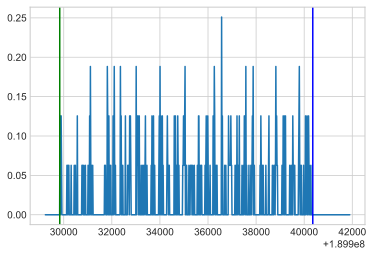

In [61]:

print(gtistart.size)
plt.plot(time,count)
for index,start in enumerate(gtistart):
    plt.axvline(start,c='g')
    plt.axvline(gtistop[index],c='b')   
#plt.axhline(0.1,c='b',alpha=0.4)

189929845.773 189940341.773
gti_mjd_start 53012.2621039
gti_mjd_stop 53012.3835853


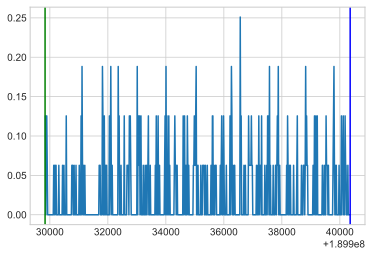

In [67]:
def get_time(gtistart,gtistop,time,count):
    new_time=[]
    new_count=[]
    for index,(time_ ,count_)in enumerate(zip(time,count)):
        if time_ >= gtistart and time_ <= gtistop:
            new_time.append(time_)
            new_count.append(count_)
    return new_time,new_count   


new_time,new_count=get_time(gtistart,gtistop,time,count)
print(new_time[0],new_time[-1])
print("gti_mjd_start",mjdzero+new_time[0]/86400)
print("gti_mjd_stop",mjdzero+new_time[-1]/86400)
plt.plot(new_time,new_count)
for index,start in enumerate(gtistart):
    plt.axvline(start,c='g')
    plt.axvline(gtistop[index],c='b')  


792
208


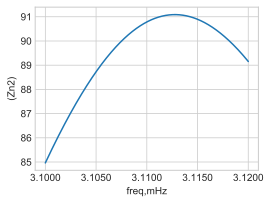

In [66]:
new_time=new_time-new_time[0]
print(time.size)
tj=get_tj(new_time,new_count)
N=tj.size
print(tj.size)
x=np.linspace(0.003,0.004,1001)
#x=np.linspace(0.00311,0.003112,1001)
#x=np.linspace(0.003110303,0.003110305,2001)
x=np.linspace(0.00310,0.00312,2001)
#x=np.linspace(0.00310967,0.00310969,2001)
#x=np.linspace(0.00311017,0.00311019,2001)

import os 
if os.path.exists("chandra%s.txt"%num):
    os.remove("chandra%s.txt"%num)
with open("chandra%s.txt"%num,"a") as f:
    for freq in x:       
        f.write(str(ZetaN(freq,0))+'\n')      

y=np.loadtxt("chandra%s.txt"%num,delimiter='\n')
#plt.xlim(0.003105,0.003120)
plt.figure(1,figsize=(4,3))
plt.xlabel('freq,mHz')
plt.ylabel('(Zn2)')
plt.gca().xaxis.set_major_formatter(ticker.FormatStrFormatter('%.4f'))
plt.plot(x*1000,y)

In [63]:
zeromin=1
freqmin=0.3
for freq in x:
    if ZetaN(freq,0)>zeromin:
        zeromin=ZetaN(freq,0)
        freqmin=freq
print(freqmin,1/freqmin,zeromin)


0.00311277 321.257272462 91.0887911642


In [ ]:
1/321.85

In [10]:
import numpy as np
from scipy import integrate
num=4523
#FOR chandra with barycenter correction
lightcurve=pyfits.open('/Volumes/Brettlv_G_m/RX_J0806/%s/repro/RXJ0806_lc.fits'%num)
time1=lightcurve[1].data['TIME']
count1=lightcurve[1].data['COUNTS']

num=4524
#FOR chandra
lightcurve=pyfits.open('/Volumes/Brettlv_G_m/RX_J0806/%s/repro/RXJ0806_lc.fits'%num)
time2=lightcurve[1].data['TIME']
count2=lightcurve[1].data['COUNTS']


num=4525
#FOR chandra with applied barycenter correction
lightcurve=pyfits.open('/Volumes/Brettlv_G_m/RX_J0806/%s/repro/RXJ0806_lc.fits'%num)
time3=lightcurve[1].data['TIME']
count3=lightcurve[1].data['COUNTS']


num=4526
#FOR chandra
lightcurve=pyfits.open('/Volumes/Brettlv_G_m/RX_J0806/%s/repro/RXJ0806_lc.fits'%num)
time4=lightcurve[1].data['TIME']
count4=lightcurve[1].data['COUNTS']

num=4527
#FOR chandra
lightcurve=pyfits.open('/Volumes/Brettlv_G_m/RX_J0806/%s/repro/RXJ0806_lc.fits'%num)
time5=lightcurve[1].data['TIME']
count5=lightcurve[1].data['COUNTS']

num=5282
#FOR chandra
lightcurve=pyfits.open('/Volumes/Brettlv_G_m/RX_J0806/%s/repro/RXJ0806_lc.fits'%num)
time6=lightcurve[1].data['TIME']
count6=lightcurve[1].data['COUNTS']

time=np.hstack((time1,time2,time3,time4,time5,time6))
count=np.hstack((count1,count2,count3,count4,count5,count6))

print("tzero",time[0])
print("obs_mjd_zero",mjdzero+(time[0]+TIMEZERO)/86400)
time=time-time[0]
size=time.size
print(time[-1]/365/86400)
print(time.size)
tj=get_tj(time,count)
N=tj.size
print(tj.size)

tzero 189724247.372
obs_mjd_zero 53009.8824927
0.880300240227
4950
1803


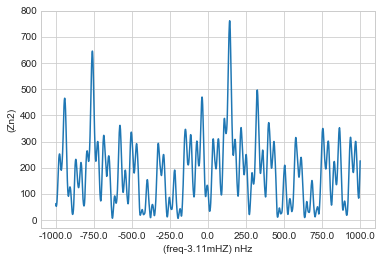

In [11]:
x=np.linspace(0.003109,0.003111,2001)
#x=np.linspace(0.0031,0.00312,2001)
#x=np.linspace(0.003110142,0.003110144,2001)
#x=np.linspace(0.00311013,0.00311015,2001)
import os 
if os.path.exists("chandra%s.txt"%num):
    os.remove("chandra%s.txt"%num)
with open("chandra%s.txt"%num,"a") as f:
    for freq in x:       
        f.write(str(ZetaN(freq,0))+'\n')      

y=np.loadtxt("chandra%s.txt"%num,delimiter='\n')
#plt.xlim(0.003105,0.003120)
plt.figure(1,figsize=(6,4))
plt.xlabel('(freq-3.11mHZ) nHz')
plt.ylabel('(Zn2)')
plt.gca().xaxis.set_major_formatter(ticker.FormatStrFormatter('%.1f'))
plt.plot((x-0.00311)*10**9,y)

In [12]:
zeromin=1
freqmin=0.3
for freq in x:
    if ZetaN(freq,0)>zeromin:
        zeromin=ZetaN(freq,0)
        freqmin=freq
print(freqmin,1/freqmin,zeromin)

0.003110143 321.528624247 761.259824893


In [ ]:
4*10**-16*86400*365

In [ ]:
1.2e-5 ms

In [ ]:
1/0.0031101

In [ ]:
xmmnum='0150800101'
xmmnum='0206100101'
xmmnum='0551860101'
xmmnum='0690420101'
xmmnum='0784670101'

In [27]:
import numpy as np
from scipy import integrate
#combine3  

num=4523
#FOR chandra with barycenter correction
lightcurve=pyfits.open('/Volumes/Brettlv_G_m/RX_J0806/%s/repro/RXJ0806_lc.fits'%num)
time1=lightcurve[1].data['TIME']
count1=lightcurve[1].data['COUNTS']

num=4524
#FOR chandra with barycenter correction
lightcurve=pyfits.open('/Volumes/Brettlv_G_m/RX_J0806/%s/repro/RXJ0806_lc.fits'%num)
time2=lightcurve[1].data['TIME']
count2=lightcurve[1].data['COUNTS']

num=4525
#FOR chandra with barycenter correction
lightcurve=pyfits.open('/Volumes/Brettlv_G_m/RX_J0806/%s/repro/RXJ0806_lc.fits'%num)
time3=lightcurve[1].data['TIME']
count3=lightcurve[1].data['COUNTS']


# xmmnum='0150800101'
# lightcurve=pyfits.open('/Users/brettlv/RXJ0806_local/%s/pn_lccor_0.3-2keV.lc'%xmmnum)
# time2=lightcurve[1].data['TIME']
# count2=lightcurve[1].data['RATE']



time=np.hstack((time1,time2,time3))
count=np.hstack((count1,count2,count3))

print("tzero",time[0])
print("obs_mjd_zero",mjdzero+(time[0]+TIMEZERO)/86400)
time=time-time[0]
size=time.size
print(time[-1]/365/86400)

print(time.size)
tj=get_tj(time,count)
N=tj.size
print(tj.size)

tzero 189724247.372
obs_mjd_zero 53009.8824927
0.0361870893919
2785
1019


In [ ]:
import numpy as np
from scipy import integrate
#combine2  

num=4526
#FOR chandra with barycenter correction
lightcurve=pyfits.open('/Volumes/Brettlv_G_m/RX_J0806/%s/repro/RXJ0806_lc.fits'%num)
time1=lightcurve[1].data['TIME']
count1=lightcurve[1].data['COUNTS']

num=4527
#FOR chandra with barycenter correction
lightcurve=pyfits.open('/Volumes/Brettlv_G_m/RX_J0806/%s/repro/RXJ0806_lc.fits'%num)
time2=lightcurve[1].data['TIME']
count2=lightcurve[1].data['COUNTS']

# num=5282
# #FOR chandra with barycenter correction
# lightcurve=pyfits.open('/Volumes/Brettlv_G_m/RX_J0806/%s/repro/RXJ0806_lc.fits'%num)
# time3=lightcurve[1].data['TIME']
# count3=lightcurve[1].data['COUNTS']


# xmmnum='0150800101'
# lightcurve=pyfits.open('/Users/brettlv/RXJ0806_local/%s/pn_lccor_0.3-2keV.lc'%xmmnum)
# time2=lightcurve[1].data['TIME']
# count2=lightcurve[1].data['RATE']

time=np.hstack((time1,time2))
count=np.hstack((count1,count2))

print("tzero",time[0])
print("obs_mjd_zero",mjdzero+(time[0]+TIMEZERO)/86400)
time=time-time[0]
size=time.size
print(time[-1]/365/86400)

print(time.size)
tj=get_tj(time,count)
N=tj.size
print(tj.size)

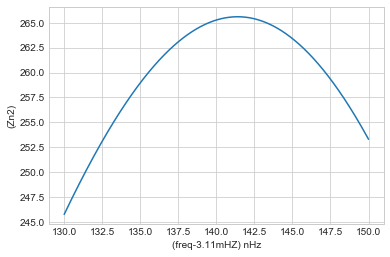

In [37]:


x=np.linspace(0.003,0.004,1001)
x=np.linspace(0.003109,0.003111,2001)
#x=np.linspace(0.0031,0.00312,2001)
x=np.linspace(0.00311013,0.00311015,2001)
#x=np.linspace(0.003110204,0.003110206,2001)
import os 
if os.path.exists("chandra%s.txt"%num):
    os.remove("chandra%s.txt"%num)
with open("chandra%s.txt"%num,"a") as f:
    for freq in x:       
        f.write(str(ZetaN(freq,0))+'\n')      

y=np.loadtxt("chandra%s.txt"%num,delimiter='\n')
#plt.xlim(0.003105,0.003120)
plt.figure(1,figsize=(6,4))
plt.xlabel('(freq-3.11mHZ) nHz')
plt.ylabel('(Zn2)')
plt.gca().xaxis.set_major_formatter(ticker.FormatStrFormatter('%.1f'))
plt.plot((x-0.00311)*10**9,y)

In [38]:
zeromin=1
freqmin=0.3
for freq in x:
    if ZetaN(freq,0)>zeromin:
        zeromin=ZetaN(freq,0)
        freqmin=freq
print(freqmin,1/freqmin,zeromin)

0.0031101414 321.528789656 265.602812955


### 

In [ ]:
1/321.853

In [39]:
import numpy as np
from scipy import integrate
#combine 2009all
num=12060
#FOR chandra with barycenter correction
lightcurve=pyfits.open('/Volumes/Brettlv_G_m/RX_J0806/%s/repro/RXJ0806_lc.fits'%num)
time1=lightcurve[1].data['TIME']
count1=lightcurve[1].data['COUNTS']
mjdzero=lightcurve[0].header['MJDREF']
TIMEZERO=lightcurve[0].header['TIMEZERO']

num=12061
#FOR chandra
lightcurve=pyfits.open('/Volumes/Brettlv_G_m/RX_J0806/%s/repro/RXJ0806_lc.fits'%num)
time2=lightcurve[1].data['TIME']
count2=lightcurve[1].data['COUNTS']


num=11027
#FOR chandra with applied barycenter correction
lightcurve=pyfits.open('/Volumes/Brettlv_G_m/RX_J0806/%s/repro/RXJ0806_lc.fits'%num)
time3=lightcurve[1].data['TIME']
count3=lightcurve[1].data['COUNTS']


num=11028
#FOR chandra
lightcurve=pyfits.open('/Volumes/Brettlv_G_m/RX_J0806/%s/repro/RXJ0806_lc.fits'%num)
time4=lightcurve[1].data['TIME']
count4=lightcurve[1].data['COUNTS']


time=np.hstack((time1,time2,time3,time4))
count=np.hstack((count1,count2,count3,count4))

print("tzero",time[0])
print("obs_mjd_zero",mjdzero+(time[0]+TIMEZERO)/86400)
time=time-time[0]
size=time.size
print(time[-1]/365/86400)
print(time.size)
tj=get_tj(time,count)
N=tj.size
print(tj.size)

tzero 377731785.782
obs_mjd_zero 55185.8956688
0.0114041535396
12697
4258


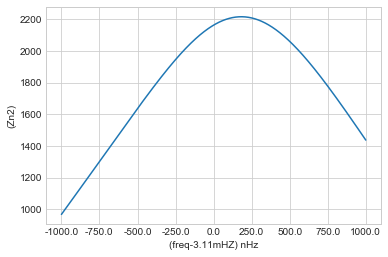

In [40]:


#x=np.linspace(0.003,0.004,1001)
x=np.linspace(0.003109,0.003111,2001)
#x=np.linspace(0.0031,0.00312,2001)
#x=np.linspace(0.00311017,0.00311019,2001)
#x=np.linspace(0.00311013,0.00311015,2001)
import os 
if os.path.exists("chandra%s.txt"%num):
    os.remove("chandra%s.txt"%num)
with open("chandra%s.txt"%num,"a") as f:
    for freq in x:       
        f.write(str(ZetaN(freq,0))+'\n')      

y=np.loadtxt("chandra%s.txt"%num,delimiter='\n')
#plt.xlim(0.003105,0.003120)
plt.figure(1,figsize=(6,4))
plt.xlabel('(freq-3.11mHZ) nHz')
plt.ylabel('(Zn2)')
plt.gca().xaxis.set_major_formatter(ticker.FormatStrFormatter('%.1f'))
plt.plot((x-0.00311)*10**9,y)

In [41]:
zeromin=1
freqmin=0.3
for freq in x:
    if ZetaN(freq,0)>zeromin:
        zeromin=ZetaN(freq,0)
        freqmin=freq
print(freqmin,1/freqmin,zeromin)

0.003110182 321.524592452 2215.15718538


In [ ]:
import numpy as np
from scipy import integrate
#combine2004 all
num=4523
#FOR chandra Without Barycenter correction
lightcurve=pyfits.open('/Volumes/Brettlv_G_m/RX_J0806/%s/primary/src_lc_paper.fits'%num)
time1=lightcurve[1].data['TIME']
count1=lightcurve[1].data['COUNTS']

num=4524
#FOR chandra
lightcurve=pyfits.open('/Volumes/Brettlv_G_m/RX_J0806/%s/primary/src_lc_paper.fits'%num)
time2=lightcurve[1].data['TIME']
count2=lightcurve[1].data['COUNTS']


num=4525
#FOR chandra
lightcurve=pyfits.open('/Volumes/Brettlv_G_m/RX_J0806/%s/primary/src_lc_paper.fits'%num)
time3=lightcurve[1].data['TIME']
count3=lightcurve[1].data['COUNTS']


num=4526
#FOR chandra
lightcurve=pyfits.open('/Volumes/Brettlv_G_m/RX_J0806/%s/primary/src_lc_paper.fits'%num)
time4=lightcurve[1].data['TIME']
count4=lightcurve[1].data['COUNTS']

num=4527
#FOR chandra
lightcurve=pyfits.open('/Volumes/Brettlv_G_m/RX_J0806/%s/primary/src_lc_paper.fits'%num)
time5=lightcurve[1].data['TIME']
count5=lightcurve[1].data['COUNTS']

num=5282
#FOR chandra
lightcurve=pyfits.open('/Volumes/Brettlv_G_m/RX_J0806/%s/primary/src_lc_paper.fits'%num)
time6=lightcurve[1].data['TIME']
count6=lightcurve[1].data['COUNTS']

time=np.hstack((time1,time2,time3,time4,time5,time6))
count=np.hstack((count1,count2,count3,count4,count5,count6))

print("tzero",time[0])
time=time-time[0]
size=time.size
print(time[-1]/365/86400)
print(time.size)
tj=get_tj(time,count)
N=tj.size
print(tj.size)

time.size,count.size


x=np.linspace(0.003,0.004,1001)
x=np.linspace(0.003,0.0032,2001)
#x=np.linspace(0.0031102,0.0031104,201)
import os 
if os.path.exists("chandra%s.txt"%num):
    os.remove("chandra%s.txt"%num)
with open("chandra%s.txt"%num,"a") as f:
    for freq in x:       
        f.write(str(ZetaN(freq,0))+'\n')      

y=np.loadtxt("chandra%s.txt"%num,delimiter='\n')
#plt.xlim(0.003105,0.003120)
plt.figure(1,figsize=(6,4))
plt.xlabel('(freq-3.11mHZ) nHz')
plt.ylabel('(Zn2)')
plt.gca().xaxis.set_major_formatter(ticker.FormatStrFormatter('%.1f'))
plt.plot((x-0.00311)*10**9,y)

In [ ]:
zeromin=1
freqmin=0.3
for freq in x:
    if ZetaN(freq,0)>zeromin:
        zeromin=ZetaN(freq,0)
        freqmin=freq
print(freqmin,1/freqmin,zeromin)

In [ ]:
24*3600*365*3.6*10**-13 #mhz

In [ ]:
0.00001/(24*3600*365*4*10**3)

In [ ]:
plt.plot(period,sigma_rate)

In [ ]:
plt.plot(freq,powdata)
plt.xlim(0,0.01)

In [ ]:
1/321.55

In [ ]:
0.0002*10**-3/(14*365*86400)

In [ ]:
0.00004*10**-3/(0.5*365*86400)

In [ ]:
2256+508.9+410+45

In [ ]:
1/0.00312286105407255

In [ ]:
1/321.55

In [ ]:
(1/3.104-1/3.105)*1000

In [ ]:
0.001mhz @ 0.1s

(1679,) (4478,)
6157
2724


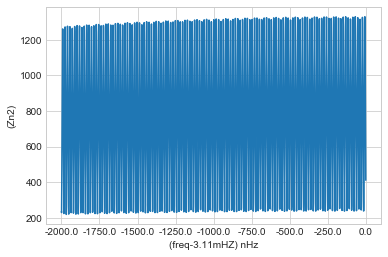

In [50]:
#for xmm combine2
import numpy as np
from scipy import integrate

xmmnum='0150800101'
# xmmnum='0206100101'
# xmmnum='0551860101'
# xmmnum='0690420101'
#lightcurve=pyfits.open('/Volumes/Brettlv_G_m/RX_J0806/xmm/0784670101/pn_lccor_0.3-2keV.lc')
lightcurve=pyfits.open('/Users/brettlv/RXJ0806_local/%s/pn_lccor_0.3-2keV.lc'%xmmnum)

#lightcurve=pyfits.open('/Users/brettlv/RXJ0806_local/0551860101//pn_lccor_0.3-2keV.lc')
#lightcurve=pyfits.open('/Users/brettlv/RXJ0806_local/0690420101/pn_lccor_0.3-2keV.lc')
#lightcurve=pyfits.open('/Users/brettlv/RXJ0806_local/0784670101/pn_lccor_0.3-2keV.lc')
time1=lightcurve[1].data['TIME']
count1=lightcurve[1].data['RATE']

#xmmnum='0784670101'
xmmnum='0206100101'
lightcurve=pyfits.open('/Users/brettlv/RXJ0806_local/%s/pn_lccor_0.3-2keV.lc'%xmmnum)
time2=lightcurve[1].data['TIME']
count2=lightcurve[1].data['RATE']



time=np.hstack((time1,time2))
count=np.hstack((count1,count2))
print(time1.shape,time2.shape)
time=time-time[0]
size=time.size

print(size)
tj=get_tj(time,count)
N=tj.size
print(tj.size)

#x=np.linspace(0.003,0.004,2001)

x=np.linspace(0.003,0.004,1001)
x=np.linspace(0.003108,0.00311,2001)
#x=np.linspace(0.003106,0.003108,2001)
#x=np.linspace(0.003110,0.003112,2001)
#x=np.linspace(0.00311074,0.00311076,2001)

import os 
if os.path.exists("xmm%s.txt"%xmmnum):
    os.remove("xmm%s.txt"%xmmnum)
with open("xmm%s.txt"%xmmnum,"a") as f:
    for freq in x:       
        f.write(str(ZetaN(freq,0))+'\n')      

y=np.loadtxt("xmm%s.txt"%xmmnum,delimiter='\n')
#plt.xlim(0.003105,0.003120)
plt.figure(1,figsize=(6,4))
plt.xlabel('(freq-3.11mHZ) nHz')
plt.ylabel('(Zn2)')
plt.gca().xaxis.set_major_formatter(ticker.FormatStrFormatter('%.1f'))
plt.plot((x-0.00311)*10**9,y)

In [51]:
zeromin=1
freqmin=0.3
for freq in x:
    if ZetaN(freq,0)>zeromin:
        zeromin=ZetaN(freq,0)
        freqmin=freq
print(freqmin,zeromin)

0.003109931 1329.8194984


In [ ]:
time[0],time[-1]/86400/365

In [52]:
import numpy as np
from scipy import integrate
import astropy
from astropy.time import Time

#FOR single xmm with lightcurve
xmmnum='0150800101'
#xmmnum='0206100101'
#xmmnum='0551860101'
#xmmnum='0690420101'
#xmmnum='0784670101'

#lightcurve=pyfits.open('/Volumes/Brettlv_G_m/RX_J0806/xmm/0784670101/pn_lccor_0.3-2keV.lc')
lightcurve=pyfits.open('/Users/brettlv/RXJ0806_local/%s/pn_lccor_0.3-2keV.lc'%xmmnum)
#lightcurve=pyfits.open('/Users/brettlv/RXJ0806_local/0551860101//pn_lccor_0.3-2keV.lc')
#lightcurve=pyfits.open('/Users/brettlv/RXJ0806_local/0690420101/pn_lccor_0.3-2keV.lc')
#lightcurve=pyfits.open('/Users/brettlv/RXJ0806_local/0784670101/pn_lccor_0.3-2keV.lc')
#time=lightcurve[1].data['TIME']
#count=lightcurve[1].data['RATE']


header=lightcurve[1].header
mjdzero=header['MJDREF']
t=Time(mjdzero,format='mjd')
tstart=header['TSTART']
time=lightcurve[1].data['TIME']

print("obs_num",xmmnum)
print("MJDzero",mjdzero)
print("DATE-TT-zero",t.isot)
      

print("tstart_header",tstart)
print("tzero",time[0])
print("tstart_mjd",mjdzero+(tstart)/86400)
print("obs_mjd_zero",mjdzero+(time[0])/86400)
print("Timesys",lightcurve[1].header['TIMESYS'])
print("tzero_lc",time[0])
time=time-time[0]
size=time.size
print("during ",time[-1])
print(size)
tj=get_tj(time,count)
N=tj.size
print(tj.size)


obs_num 0150800101
MJDzero 50814.0
DATE-TT-zero 1998-01-01T00:00:00.000
tstart_header 152616294.056604
tzero 152616302.057
tstart_mjd 52580.392292321805
obs_mjd_zero 52580.3923849
Timesys TDB
tzero_lc 152616302.057
during  26848.0
1679
773


In [ ]:
#timearrive.info()

In [53]:
import numpy as np
from scipy import integrate
import astropy
from astropy.time import Time
#TIME ARRIVE method

xmmnum='0150800101'
#xmmnum='0206100101'
#xmmnum='0551860101'
#xmmnum='0690420101'
#xmmnum='0784670101'

#lightcurve=pyfits.open('/Volumes/Brettlv_G_m/RX_J0806/xmm/0784670101/pn_lccor_0.3-2keV.lc')
#lightcurve=pyfits.open('/Users/brettlv/RXJ0806_local/%s/pn_lccor_0.3-2keV.lc'%xmmnum)
#timearrive=pyfits.open('/Users/brettlv/RXJ0806_local/%s/pnf.evt'%xmmnum)
timearrive=pyfits.open('/Users/brettlv/RXJ0806_local/%s/pn_filt.fits'%xmmnum)
#lightcurve=pyfits.open('/Users/brettlv/RXJ0806_local/0551860101//pn_lccor_0.3-2keV.lc')
#lightcurve=pyfits.open('/Users/brettlv/RXJ0806_local/0690420101/pn_lccor_0.3-2keV.lc')
#lightcurve=pyfits.open('/Users/brettlv/RXJ0806_local/0784670101/pn_lccor_0.3-2keV.lc')
#time=lightcurve[1].data['TIME']
#count=lightcurve[1].data['RATE']
print("obs_num",xmmnum)
#time=time-time[0]
#size=time.size
#tj=get_tj(time,count)
tj=timearrive[1].data['TIME']
print('time arrived zero',tj[0])
tj=tj-tj[0]
N=tj.size
print("Size",tj.size)
print("during ",tj[-1])
print("Timesys",lightcurve[1].header['TIMESYS'])

obs_num 0150800101
time arrived zero 152616302.677
Size 177507
during  26840.408703
Timesys TDB


In [55]:
#timearrive.info()

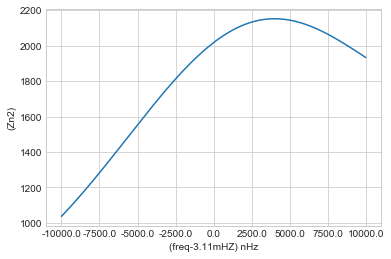

In [56]:
#x=np.linspace(0.00310985,0.00310987,2001)
#x=np.linspace(0.00310946,0.00310948,2001)
x=np.linspace(0.003,0.004,1001)
x=np.linspace(0.00310,0.00312,2001)
#x=np.linspace(0.00311047,0.00311049,2001)
import os 
if os.path.exists("xmm%s.txt"%xmmnum):
    os.remove("xmm%s.txt"%xmmnum)
with open("xmm%s.txt"%xmmnum,"a") as f:
    for freq in x:       
        f.write(str(ZetaN(freq,0))+'\n')      

y=np.loadtxt("xmm%s.txt"%xmmnum,delimiter='\n')
#plt.xlim(0.003105,0.003120)
plt.figure(1,figsize=(6,4))
plt.xlabel('(freq-3.11mHZ) nHz')
plt.ylabel('(Zn2)')
plt.gca().xaxis.set_major_formatter(ticker.FormatStrFormatter('%.1f'))
plt.plot((x-0.00311)*10**9,y)

In [57]:
zeromin=1
freqmin=0.3
for freq in x:
    if ZetaN(freq,0)>zeromin:
        zeromin=ZetaN(freq,0)
        freqmin=freq
print(freqmin,1/freqmin,zeromin)       

0.003114 321.130378934 2151.77648516


In [147]:

#FOR SWIFT xrt

# xrtnum='00035180001'
# xrtnum='00035180002'
# xrtnum='00035180003'
# xrtnum='00035180004'
# xrtnum='00035705001'
# xrtnum='00035705002'
#xrtnum='00037762001'
# xrtnum='00035180005'
# xrtnum='00037762002'
# xrtnum='00037762003'
# xrtnum='00037762004'
xrtnum='00037762005'




lightcurve=pyfits.open('/Volumes/Brettlv_G_m/RX_J0806/swift/%s_xrt/PCsrc.lc'%xrtnum)
#lightcurve=pyfits.open('/Volumes/Brettlv_G_m/RX_J0806/swift/%s_xrt/PCsrc_bary.lc'%xrtnum)
#lightcurve=pyfits.open('/Users/brettlv/RXJ0806_local/%s/pn_lccor_0.3-2keV.lc'%xmmnum
header=lightcurve[1].header
time=lightcurve[1].data['TIME']
count=lightcurve[1].data['RATE']
gtistart=lightcurve[2].data['START']
gtiend=lightcurve[2].data['STOP']

timezero=lightcurve[1].header['TIMEZERO']
mjdobs=lightcurve[1].header['MJD-OBS']
mjdrefI=header['MJDREFI']
mjdreffrac=header['MJDREFF']
Timeref=header['TIMEREF']
tstart=header['TSTART']


print("obs_num",xrtnum)
print("tstart_header",tstart)
print("timezero_header",timezero)

print("tzero",time[0])
print("tstart_mjd",mjdrefI+mjdreffrac+(tstart)/86400)
print("obs_mjd_zero",mjdobs)
print("Timesys",header['TIMESYS'])
print("TIMEref",Timeref)

#print("datatimezero",time[0])
time=time-time[0]
size=time.size

print("during ",time[-1])
print(size)
tj=get_tj(time,count)
N=tj.size
print(tj.size)


obs_num 00037762005
tstart_header 292292336.1121033
timezero_header 292292338.6121033
tzero 0.0
tstart_mjd 55293.01389231601
obs_mjd_zero 55293.01389231601
Timesys TT
TIMEref LOCAL
during  81300.0
1737
246


In [148]:
print(lightcurve.info())

Filename: /Volumes/Seagate_Backup_Plus_Drive_Lvb/RX_J0806/swift/00037762005_xrt/PCsrc.lc
No.    Name         Type      Cards   Dimensions   Format
0    PRIMARY     PrimaryHDU      38   ()              
1    RATE        BinTableHDU    700   1737R x 4C   ['D', 'E', 'E', 'E']   
2    GTI         BinTableHDU     52   13R x 2C     ['1D', '1D']   
3    REG00101    BinTableHDU     79   1R x 6C      [1D, 1D, 16A, 1D, 1D, 1I]   
None


In [149]:
time.size,gtistart.size,gtiend.size

(1737, 13, 13)

[  2.92292336e+08   2.92298096e+08] [  2.92292818e+08   2.92298698e+08]


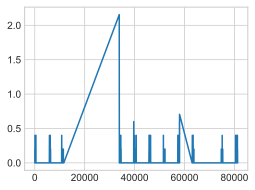

In [150]:
plt.figure(figsize=(4,3))
gtistart=lightcurve[2].data['START']
gtiend=lightcurve[2].data['STOP']

print(gtistart[:2],gtiend[:2])
plt.plot(time[:],count[:])


(292282336.11210328, 292383637.36152345)

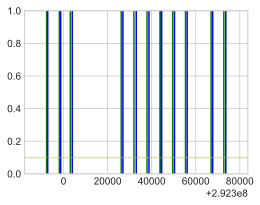

In [151]:
plt.figure(figsize=(4,3))
for index,(start,end) in enumerate(zip(gtistart,gtiend)):
    plt.axvline(start,c='g')
    plt.axvline(end,c='b')
    #print(start)
    #print(end)
    
plt.axhline(0.1,c='y',alpha=0.4)
plt.xlim(gtistart[0]-10**4,gtiend[-1]+10**4)
#print(gtistart[:2],gtiend[:2])

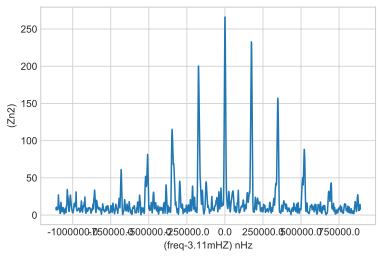

In [152]:
###### x=np.linspace(0.00310985,0.00310987,2001)
#x=np.linspace(0.00310946,0.00310948,2001)
x=np.linspace(0.002,0.004,2001)
#x=np.linspace(0.0031,0.00312,2001)
#x=np.linspace(0.00310,0.00312,2001)
#x=np.linspace(0.00311152,0.00311154,2001)
#x=np.linspace(0.00311126,0.00311128,2001)
#x=np.linspace(0.00311050,0.00311052,2001)
#x=np.linspace(0.00310971,0.00310973,2001)


import os 
if os.path.exists("xrt%s.txt"%xrtnum):
    os.remove("xrt%s.txt"%xrtnum)
with open("xrt%s.txt"%xrtnum,"a") as f:
    for freq in x:       
        f.write(str(ZetaN(freq,0))+'\n')      

y=np.loadtxt("xrt%s.txt"%xrtnum,delimiter='\n')
#plt.xlim(0.003105,0.003120)
plt.figure(1,figsize=(6,4))
plt.xlabel('(freq-3.11mHZ) nHz')
plt.ylabel('(Zn2)')
plt.gca().xaxis.set_major_formatter(ticker.FormatStrFormatter('%.1f'))
plt.plot((x-0.00311)*10**9,y)

In [153]:
zeromin=1
freqmin=0.3
for freq in x:
    if ZetaN(freq,0)>zeromin:
        zeromin=ZetaN(freq,0)
        freqmin=freq
print(freqmin,1/freqmin,zeromin)  

0.003111 321.44005143 266.046494947


In [67]:
### xrt  combine four
#FOR SWIFT xrt

xrtnum='00035180001'
print("obs_num",xrtnum)
#lightcurve=pyfits.open('/Volumes/Brettlv_G_m/RX_J0806/swift/%s_xrt/PCsrc.lc'%xrtnum)
lightcurve=pyfits.open('/Volumes/Brettlv_G_m/RX_J0806/swift/%s_xrt/PCsrc_bary.lc'%xrtnum)
time=lightcurve[1].data['TIME']
count1=lightcurve[1].data['RATE']
mjdobs=lightcurve[1].header['MJD-OBS']
header=lightcurve[1].header
tstart=header['TSTART']
time1=time+tstart
print("time1zero",time1[0])

mjdobsstart=mjdobs
firststart=tstart

timezero=lightcurve[1].header['TIMEZERO']
mjdrefI=header['MJDREFI']
mjdreffrac=header['MJDREFF']
Timeref=header['TIMEREF']
Timesys=header['TIMESYS']
print("header.TIMEZERO",timezero)

xrtnum='00035180002'
print("obs_num",xrtnum)
lightcurve=pyfits.open('/Volumes/Brettlv_G_m/RX_J0806/swift/%s_xrt/PCsrc_bary.lc'%xrtnum)
time=lightcurve[1].data['TIME']
count2=lightcurve[1].data['RATE']
tstart=lightcurve[1].header['TSTART']
time2=time+tstart
print("time2zero",time2[0])




xrtnum='00035180003'
print("obs_num",xrtnum)
lightcurve=pyfits.open('/Volumes/Brettlv_G_m/RX_J0806/swift/%s_xrt/PCsrc_bary.lc'%xrtnum)
time=lightcurve[1].data['TIME']
count3=lightcurve[1].data['RATE']
tstart=lightcurve[1].header['TSTART']
time3=time+tstart
print("time3zero",time3[0])


xrtnum='00035180004'
print("obs_num",xrtnum)

lightcurve=pyfits.open('/Volumes/Brettlv_G_m/RX_J0806/swift/%s_xrt/PCsrc_bary.lc'%xrtnum)
time=lightcurve[1].data['TIME']
count4=lightcurve[1].data['RATE']
tstart=lightcurve[1].header['TSTART']
time4=time+tstart
print("time4zero",time4[0])


time=np.hstack((time1,time2,time3,time4))
count=np.hstack((count1,count2,count3,count4))
time=time-time[0]
print("tstart_header",firststart)
print("tzero",time[0])
print("tstart_mjd",mjdrefI+mjdreffrac+(firststart)/86400)
print("obs_mjd_zero",mjdobsstart)
print("Timesys",Timesys)
print("TIMEref",Timeref)
size=time.size
print("during ",time[-1])
print(size)
tj=get_tj(time,count)
N=tj.size
print(tj.size)

obs_num 00035180001
time1zero 148008001.78
header.TIMEZERO 148008004.280031
obs_num 00035180002
time2zero 149142268.725
obs_num 00035180003
time3zero 155004272.762
obs_num 00035180004
time4zero 155009340.764
tstart_header 148008001.780031
tzero 0.0
tstart_mjd 53623.05631902813
obs_mjd_zero 53623.05631902813
Timesys TDB
TIMEref SOLARSYSTEM
during  7065838.98421
6293
797


In [68]:
time4[-1]-time4[0]
time3[-1]-time3[0]

81150.0

In [ ]:
#plt.plot(time1,count1)
#plt.plot(time2,count2)
#plt.plot(time3,count3)
# plt.plot(time4,count4)

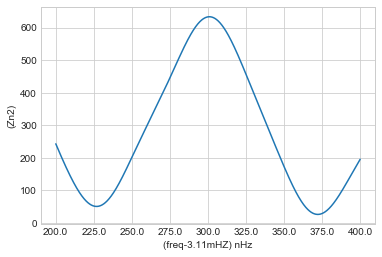

In [69]:
#x=np.linspace(0.00310985,0.00310987,2001)
#x=np.linspace(0.00310946,0.00310948,2001)
x=np.linspace(0.003,0.004,1001)
x=np.linspace(0.003,0.0032,2001)
#x=np.linspace(0.00311,0.003112,2001)
#x=np.linspace(0.00311152,0.00311154,2001)
#x=np.linspace(0.00311126,0.00311128,2001)
x=np.linspace(0.0031102,0.0031104,2001)
#x=np.linspace(0.00310971,0.00310973,2001)


import os 
if os.path.exists("xrt%s.txt"%xrtnum):
    os.remove("xrt%s.txt"%xrtnum)
with open("xrt%s.txt"%xrtnum,"a") as f:
    for freq in x:       
        f.write(str(ZetaN(freq,0))+'\n')      

y=np.loadtxt("xrt%s.txt"%xrtnum,delimiter='\n')
#plt.xlim(0.003105,0.003120)
plt.figure(1,figsize=(6,4))
plt.xlabel('(freq-3.11mHZ) nHz')
plt.ylabel('(Zn2)')
plt.gca().xaxis.set_major_formatter(ticker.FormatStrFormatter('%.1f'))
plt.plot((x-0.00311)*10**9,y)

In [70]:
zeromin=1
freqmin=0.3
for freq in x:
    if ZetaN(freq,0)>zeromin:
        zeromin=ZetaN(freq,0)
        freqmin=freq
print(freqmin,1/freqmin,zeromin) 

0.0031103009 321.51230127 633.51929303


In [71]:
### xrt  combine
#FOR SWIFT xrt three


#xrtnum='00035180001'
# xrtnum='00035180002'
# xrtnum='00035180003'
# xrtnum='00035180004'
# xrtnum='00035705001'
# xrtnum='00035705002'
#xrtnum='00037762001'
# xrtnum='00035180005'
# xrtnum='00037762002'
# xrtnum='00037762003'
# xrtnum='00037762004'
# xrtnum='00037762005'

xrtnum='00037762003'
print("obs_num",xrtnum)
#lightcurve=pyfits.open('/Volumes/Brettlv_G_m/RX_J0806/swift/%s_xrt/PCsrc.lc'%xrtnum)
lightcurve=pyfits.open('/Volumes/Brettlv_G_m/RX_J0806/swift/%s_xrt/PCsrc_bary.lc'%xrtnum)
time=lightcurve[1].data['TIME']
count1=lightcurve[1].data['RATE']
mjdobs=lightcurve[1].header['MJD-OBS']
header=lightcurve[1].header
tstart=header['TSTART']
time1=time+tstart
print("time1zero",time1[0])
print("time1tstart",tstart)

mjdobsstart=mjdobs
firststart=tstart

timezero=lightcurve[1].header['TIMEZERO']
mjdrefI=header['MJDREFI']
mjdreffrac=header['MJDREFF']
Timeref=header['TIMEREF']
Timesys=header['TIMESYS']
print("header.TIMEZERO",timezero)
print()

xrtnum='00037762004'
print("obs_num",xrtnum)
lightcurve=pyfits.open('/Volumes/Brettlv_G_m/RX_J0806/swift/%s_xrt/PCsrc_bary.lc'%xrtnum)
time=lightcurve[1].data['TIME']
count2=lightcurve[1].data['RATE']
tstart=lightcurve[1].header['TSTART']
time2=time+tstart
print("time2zero",time2[0])
print("time2tstart",tstart)

xrtnum='00037762005'
print("obs_num",xrtnum)
lightcurve=pyfits.open('/Volumes/Brettlv_G_m/RX_J0806/swift/%s_xrt/PCsrc_bary.lc'%xrtnum)
time=lightcurve[1].data['TIME']
count3=lightcurve[1].data['RATE']
tstart=lightcurve[1].header['TSTART']
time3=time+tstart
print("time3zero",time3[0])
print("time3tstart",tstart)

# xrtnum='00035180004'
# print("obs_num",xrtnum)
# lightcurve=pyfits.open('/Volumes/Brettlv_G_m/RX_J0806/swift/%s_xrt/PCsrc_bary.lc'%xrtnum)
# time=lightcurve[1].data['TIME']
# count4=lightcurve[1].data['RATE']
# tstart=lightcurve[1].header['TSTART']
# time4=time+tstart
# print("time4zero",time4[0])


time=np.hstack((time1,time2,time3))
count=np.hstack((count1,count2,count3))
time=time-time[0]

#lightcurve=pyfits.open('/Users/brettlv/RXJ0806_local/%s/pn_lccor_0.3-2keV.lc'%xmmnum


print("tstart_header",firststart)
print("tzero",time[0])
print("tstart_mjd",mjdrefI+mjdreffrac+(firststart)/86400)
print("obs_mjd_zero",mjdobsstart)
print("Timesys",Timesys)
print("TIMEref",Timeref)
size=time.size
print("during ",time[-1])
print(size)
tj=get_tj(time,count)
N=tj.size
print(tj.size)



obs_num 00037762003
time1zero 291603414.885
time1tstart 291603414.8850084
header.TIMEZERO 291603415.3854028

obs_num 00037762004
time2zero 291945286.038
time2tstart 291945286.0380808
obs_num 00037762005
time3zero 292292450.69
time3tstart 292292450.689608
tstart_header 291603414.8850084
tzero 0.0
tstart_mjd 55285.04026700241
obs_mjd_zero 55285.04026700241
Timesys TDB
TIMEref SOLARSYSTEM
during  770325.8046
11601
861


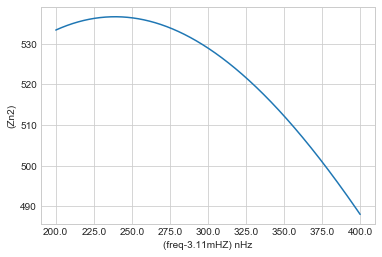

In [72]:
#x=np.linspace(0.00310985,0.00310987,2001)
#x=np.linspace(0.00310946,0.00310948,2001)
x=np.linspace(0.003,0.004,1001)
x=np.linspace(0.003,0.0032,2001)
#x=np.linspace(0.00311,0.003112,2001)
#x=np.linspace(0.00311152,0.00311154,2001)
#x=np.linspace(0.00311126,0.00311128,2001)
x=np.linspace(0.0031102,0.0031104,2001)
#x=np.linspace(0.00310971,0.00310973,2001)


import os 
if os.path.exists("xrt%s.txt"%xrtnum):
    os.remove("xrt%s.txt"%xrtnum)
with open("xrt%s.txt"%xrtnum,"a") as f:
    for freq in x:       
        f.write(str(ZetaN(freq,0))+'\n')      

y=np.loadtxt("xrt%s.txt"%xrtnum,delimiter='\n')
#plt.xlim(0.003105,0.003120)
plt.figure(1,figsize=(6,4))
plt.xlabel('(freq-3.11mHZ) nHz')
plt.ylabel('(Zn2)')
plt.gca().xaxis.set_major_formatter(ticker.FormatStrFormatter('%.1f'))
plt.plot((x-0.00311)*10**9,y)

In [73]:
zeromin=1
freqmin=0.3
for freq in x:
    if ZetaN(freq,0)>zeromin:
        zeromin=ZetaN(freq,0)
        freqmin=freq
print(freqmin,1/freqmin,zeromin) 

0.0031102389 321.518710347 536.623315691


In [74]:
### xrt  combine
#FOR SWIFT xrt two

xrtnum='00037762003'
print("obs_num",xrtnum)
#lightcurve=pyfits.open('/Volumes/Brettlv_G_m/RX_J0806/swift/%s_xrt/PCsrc.lc'%xrtnum)
lightcurve=pyfits.open('/Volumes/Brettlv_G_m/RX_J0806/swift/%s_xrt/PCsrc_bary.lc'%xrtnum)
time=lightcurve[1].data['TIME']
count1=lightcurve[1].data['RATE']
mjdobs=lightcurve[1].header['MJD-OBS']
header=lightcurve[1].header
tstart=header['TSTART']
time1=time+tstart
print("time1zero",time1[0])
print("time1tstart",tstart)

mjdobsstart=mjdobs
firststart=tstart

timezero=lightcurve[1].header['TIMEZERO']
mjdrefI=header['MJDREFI']
mjdreffrac=header['MJDREFF']
Timeref=header['TIMEREF']
Timesys=header['TIMESYS']
print("header.TIMEZERO",timezero)
print()

xrtnum='00037762005'
print("obs_num",xrtnum)
lightcurve=pyfits.open('/Volumes/Brettlv_G_m/RX_J0806/swift/%s_xrt/PCsrc_bary.lc'%xrtnum)
time=lightcurve[1].data['TIME']
count2=lightcurve[1].data['RATE']
tstart=lightcurve[1].header['TSTART']
time2=time+tstart
print("time2zero",time2[0])
print("time2tstart",tstart)

# xrtnum='00035180003'
# print("obs_num",xrtnum)
# lightcurve=pyfits.open('/Volumes/Brettlv_G_m/RX_J0806/swift/%s_xrt/PCsrc_bary.lc'%xrtnum)
# time=lightcurve[1].data['TIME']
# count3=lightcurve[1].data['RATE']
# tstart=lightcurve[1].header['TSTART']
# time3=time+tstart
# print("time3zero",time3[0])
# print("time3tstart",tstart)

# xrtnum='00035180004'
# print("obs_num",xrtnum)
# lightcurve=pyfits.open('/Volumes/Brettlv_G_m/RX_J0806/swift/%s_xrt/PCsrc_bary.lc'%xrtnum)
# time=lightcurve[1].data['TIME']
# count4=lightcurve[1].data['RATE']
# tstart=lightcurve[1].header['TSTART']
# time4=time+tstart
# print("time4zero",time4[0])


time=np.hstack((time1,time2))
count=np.hstack((count1,count2))
time=time-time[0]


print("tstart_header",firststart)
print("tzero",time[0])
print("tstart_mjd",mjdrefI+mjdreffrac+(firststart)/86400)
print("obs_mjd_zero",mjdobsstart)
print("Timesys",Timesys)
print("TIMEref",Timeref)
size=time.size
print("during ",time[-1])
print(size)
tj=get_tj(time,count)
N=tj.size
print(tj.size)



obs_num 00037762003
time1zero 291603414.885
time1tstart 291603414.8850084
header.TIMEZERO 291603415.3854028

obs_num 00037762005
time2zero 292292450.69
time2tstart 292292450.689608
tstart_header 291603414.8850084
tzero 0.0
tstart_mjd 55285.04026700241
obs_mjd_zero 55285.04026700241
Timesys TDB
TIMEref SOLARSYSTEM
during  770325.8046
9689
514


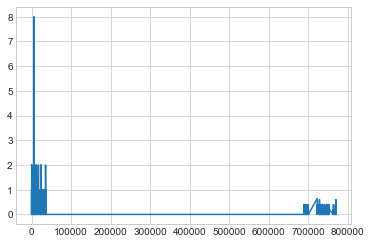

In [75]:
plt.plot(time,count)

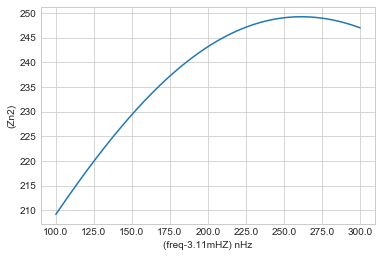

In [76]:
#x=np.linspace(0.00310985,0.00310987,2001)
#x=np.linspace(0.00310946,0.00310948,2001)
x=np.linspace(0.003,0.004,1001)
x=np.linspace(0.003,0.0032,2001)
#x=np.linspace(0.00311,0.003112,2001)
#x=np.linspace(0.00311152,0.00311154,2001)
#x=np.linspace(0.00311126,0.00311128,2001)
x=np.linspace(0.0031101,0.0031103,2001)
#x=np.linspace(0.00310971,0.00310973,2001)


import os 
if os.path.exists("xrt%s.txt"%xrtnum):
    os.remove("xrt%s.txt"%xrtnum)
with open("xrt%s.txt"%xrtnum,"a") as f:
    for freq in x:       
        f.write(str(ZetaN(freq,0))+'\n')      

y=np.loadtxt("xrt%s.txt"%xrtnum,delimiter='\n')
#plt.xlim(0.003105,0.003120)
plt.figure(1,figsize=(6,4))
plt.xlabel('(freq-3.11mHZ) nHz')
plt.ylabel('(Zn2)')
plt.gca().xaxis.set_major_formatter(ticker.FormatStrFormatter('%.1f'))
plt.plot((x-0.00311)*10**9,y)

In [77]:
zeromin=1
freqmin=0.3
for freq in x:
    if ZetaN(freq,0)>zeromin:
        zeromin=ZetaN(freq,0)
        freqmin=freq
print(freqmin,1/freqmin,zeromin) 

0.0031102613 321.51639478 249.211182934


In [ ]:
1/0.0031101-1/0.00311011

In [ ]:
0.0002*10**-3/14/365/86400


In [ ]:
3*365*24*3600*10**-16*10**3

In [ ]:
for freq in np.linspace(0.00311054,0.00311055,101):
    print(freq,ZetaN(freq,0))

In [ ]:
resolution=0.000001
num=1000
pow=np.arange(num)
max=1
for freq in np.linspace(0.003,0.0032,201):
    for mudot in np.linspace(1*10**-16,5*10**-16,41):
        print(freq,mudot,chisq(50,freq,mudot))
        if chisq(10,freq,mudot)>max:
            max=chisq(50,freq,mudot)

In [ ]:
resolution=0.000001
num=1000
pow=np.arange(num)

max=1
for freq in np.linspace(0.003,0.0032,101):
    for mudot in np.linspace(1*10**-16,5*10**-16,11):
        print(freq,mudot,chisq(50,freq,mudot))
        if chisq(10,freq,mudot)>max:
            max=chisq(50,freq,mudot)
           

In [ ]:
freq=np.linspace(0.003,0.0032,101)
mudot=np.linspace(1*10**-16,5*10**-16,11)
ax.scatter(freq,mudot,chisq(50,freq,mudot))

In [ ]:
data=np.loadtxt("/Users/brettlv/Desktop/fmudot.txt")  
print(data.shape)

from mpl_toolkits.mplot3d import Axes3D
fig=plt.figure()
ax=fig.add_subplot(111,projection='3d')
ax.scatter(data[:,0],data[:,1],data[:,2]) 
#ax.scatter(data[:,0],data[:,1],data[:,2])    

In [ ]:
ZetaN(0.003112) 
1/0.003112

In [ ]:
print('YYY')

In [ ]:
121941636.6951582432-121941474.0838779807

In [ ]:
12

In [ ]:
(8+6/60+22.9/3600)*360/24

In [ ]:
121941474.0838779807-121941636.6951582432

In [ ]:
(3.11018201-3.11014267)/(55185.8956688-53009.8824927)/86400/1000

In [ ]:
(3.10968012-3.11014267)/(52225.3552031-53009.8824927)/86400/1000

In [ ]:
4*10**-16*86400*365

Dataset mid HJD Period 
ROSAT 2449738.010 321.54629 ± 0.00008 sec 
VLT+NOT 2001-02 2452281.416 321.53314 ± 0.00034 sec 
NOT 2003 2452649.529 321.53007 ± 0.00060 sec 
INT+NOT 2003-2004 2453030.395 321.52832 ± 0.00044 sec

In [ ]:
np.arange(5)

In [157]:
topticalHJD=np.array([2449738.010,2452281.416,2452649.529,2453030.395])
topticalMHJD=topticalHJD-2400000.5
#poptical=np.array([321.54629,321.53314,321.53007,321.52832])
poptical=np.array([321.5393,321.53314,321.53007,321.52832])
erroptical=np.array([0.00008,0.00034,0.0006,0.00044])
errmu=erroptical*10**-5
muoptical=1/poptical

In [158]:
xraychandratime=np.array([52225.3552,53009.88249,53724.14914,53880.54515,55185.89567])#01,04,05,06,09
xraychandrafreq=np.array([3.10968012,3.11014267,3.1096994,3.1106808,3.11020201])*0.001


xraychandracombinetime=np.array([53009.88249,55185.89567])
xraychandracombinefreq=np.array([3.11014267,3.11018201])*0.001
xraychandrap=1/xraychandracombinefreq

xrayxmmtime=np.array([52580.39238,53314.72095,54744.886,56212.99029,57496.37908])
xrayxmmfreq=np.array([3.1102987,3.1098837,3.1098568,3.109474,3.1107573])*0.001

xrayxrttime=np.array([53623.056319,54617.801658824,55285.040267])
xrayxrtfreq=np.array([3.11015016,3.1102807,3.1102389])*0.001




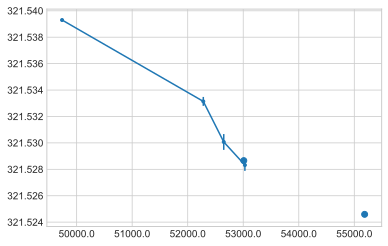

In [159]:
plt.errorbar(topticalMHJD,poptical,erroptical,fmt='.-')
plt.scatter(xraychandracombinetime,xraychandrap)
plt.gca().xaxis.set_major_formatter(ticker.FormatStrFormatter('%.1f'))
plt.gca().yaxis.set_major_formatter(ticker.FormatStrFormatter('%.3f'))

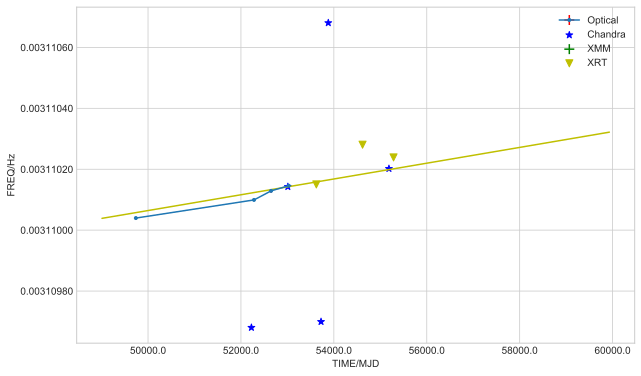

In [167]:
a=10
b=a*0.618
plt.figure(figsize=(a,b))
type1=plt.errorbar(topticalMHJD,muoptical,xerr=0,yerr=errmu,fmt='.-',ecolor='red')
type2=plt.scatter(xraychandratime,xraychandrafreq,s=50,c='b',marker='*')
#type3=plt.scatter(xrayxmmtime,xrayxmmfreq,s=100,c='g',marker='+')
type4=plt.scatter(xrayxrttime,xrayxrtfreq,s=50,c='y',marker='v')

plt.xlabel("TIME/MJD")
plt.ylabel("FREQ/Hz")
plt.gca().xaxis.set_major_formatter(ticker.FormatStrFormatter('%.1f'))
plt.gca().yaxis.set_major_formatter(ticker.FormatStrFormatter('%.8f'))


mu0=0.0031101425     # HZ   
t0=53009.889943753 #MJD(TDB)
mudot=3*10**-16
detamu=mu0-0.00311
detat=30*np.arange(365)-4000
t=detat+t0
mu=mu0+detat*86400*mudot

mjdt=Time(t,format='mjd')

plt.plot(t,mu,c="y")
#plt.annotate("predicted",xytext=(t[-1]-1000,mu[-1]-detamu),xy=(t[-1]-2000,mu[-1]-detamu),arrowprops=dict(facecolor='y',shrink=0.01),)
plt.legend((type1,type2,type3,type4),('Optical','Chandra','XMM','XRT'))
plt.savefig('/Users/brettlv/Desktop/freqtime.png',dpi=300)

In [165]:
4.95*10**-30*3.11**(19.0/3)*(0.33/0.87)**(10.0/3)#mudotdot


2.582676159618321e-28

In [163]:
((0.55*0.27)/(0.55+0.27)**(1.0/3))**0.6# chip mass

0.33133941544150297

In [ ]:
3.1108-3.1096

In [ ]:
import matplotlib.pyplot as plt
from pylab import *

a=10
b=a*0.618
plt.figure(figsize=(a,b))
type1=plt.errorbar(topticalMHJD,muoptical,xerr=0,yerr=errmu,fmt='.-',ecolor='red')
type2=plt.scatter(xraychandracombinetime,xraychandracombinefreq,s=50,c='b',marker='*')
#type3=plt.scatter(xrayxmmtime,xrayxmmfreq,s=100,c='g',marker='+')

plt.title("mu-t")
plt.xlabel("TIME/MJD")
plt.ylabel("FREQ/Hz")
plt.gca().xaxis.set_major_formatter(ticker.FormatStrFormatter('%.1f'))
plt.gca().yaxis.set_major_formatter(ticker.FormatStrFormatter('%.8f'))
#plt.annotate("combined04chandra",xytext=(xraychandracombinetime[0]-500,xraychandracombinefreq[0]+3*10**-8),xy=(xraychandracombinetime[0],xraychandracombinefreq[0]),arrowprops=dict(facecolor='black',shrink=0.01),)
#plt.annotate("combined09chandra",xytext=(xraychandracombinetime[1]-500,xraychandracombinefreq[1]+3*10**-8),xy=(xraychandracombinetime[1],xraychandracombinefreq[1]),arrowprops=dict(facecolor='black',shrink=0.01),)


plt.legend((type1,type2,type3),('Optical','Chandra','XMM'))
plt.grid(color='grey',linestyle='--',axis='both',alpha=0.3)

plt.style.use('ggplot')
#plt.style.use('seaborn-whitegrid')
#plt.show()

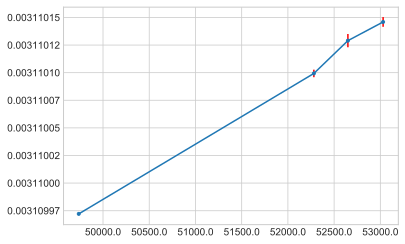

In [155]:

plt.errorbar(topticalMHJD,muoptical,xerr=0,yerr=errmu,fmt='',marker='.',ecolor='red')
plt.gca().xaxis.set_major_formatter(ticker.FormatStrFormatter('%.1f'))
plt.gca().yaxis.set_major_formatter(ticker.FormatStrFormatter('%.8f'))


In [ ]:
0.00006/86400/1000/(xraychandracombinetime[1]-xraychandracombinetime[0])

In [ ]:
86400*10*365

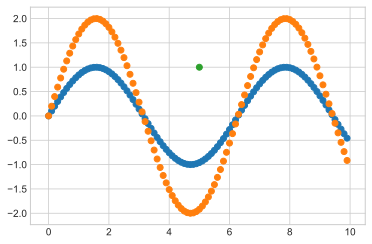

In [4]:
xx=np.arange(100)/10
yy=np.sin(xx)
plt.scatter(xx,yy)
plt.scatter(xx,2*yy)
plt.scatter(5,1)


In [5]:
#ax1 = plt.subplot(121)
#ax2 = plt.subplot(122)
np.finfo(np.longdouble),np.finfo(np.float64),np.finfo(np.float32)
xarr=np.array([1.1,1.2])
type(xarr[0]),type(xarr[1]),type(xarr)

(numpy.float64, numpy.float64, numpy.ndarray)

In [24]:
#nicer
lightcurve1=pyfits.open('/Volumes/Seagate_Backup_Plus_Drive_Lvb/RX_J0806/nicer/curve01.lc')
lightcurve.info()


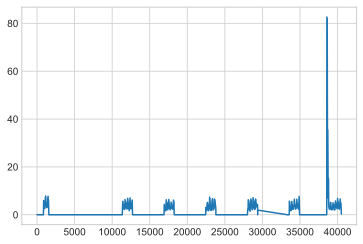

In [30]:
time=lightcurve[1].data['TIME']
count1=lightcurve[1].data['RATE']
plt.plot(time,count1)
#plt.xlim(1e4,2e4)

In [38]:
time.size,count1.size,time[1]-time[0],time[0],time[-1]


(665, 665, 208.0, 0.0, 40512.0)

In [46]:
time[-1]-time[1]

40304.0

In [45]:
(time[-1]-time[1])/(time.size-1)

60.69879518072289

In [37]:
time,count1

(array([     0.,    208.,    224.,    240.,    256.,    272.,    288.,
           304.,    320.,    336.,    352.,    368.,    384.,    400.,
           416.,    432.,    448.,    464.,    480.,    496.,    512.,
           528.,    544.,    560.,    576.,    592.,    608.,    624.,
           640.,    656.,    672.,    688.,    704.,    720.,    736.,
           752.,    768.,    784.,    800.,    816.,    832.,    848.,
           864.,    880.,    896.,    912.,    928.,    944.,    960.,
           976.,    992.,   1008.,   1024.,   1040.,   1056.,   1072.,
          1088.,   1104.,   1120.,   1136.,   1152.,   1168.,   1184.,
          1200.,   1216.,   1232.,   1248.,   1264.,   1280.,   1296.,
          1312.,   1328.,   1344.,   1360.,   1376.,   1392.,   1408.,
          1424.,   1440.,   1456.,   1472.,   1488.,   1504.,   1520.,
          1536.,   1552.,   1568.,   1584.,   1600.,  11120.,  11328.,
         11344.,  11360.,  11376.,  11392.,  11408.,  11424.,  11440.,
      

Filename: /Volumes/Seagate_Backup_Plus_Drive_Lvb/RX_J0806/nicer/curve01.lc
No.    Name         Type      Cards   Dimensions   Format
0    PRIMARY     PrimaryHDU      36   ()              
1    RATE        BinTableHDU    310   665R x 4C    [D, E, E, E]   
2    GTI         BinTableHDU     50   19R x 2C     [1D, 1D]   


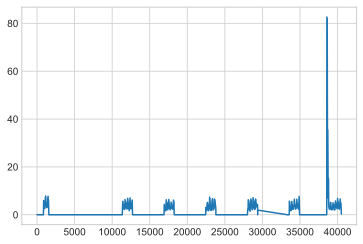

In [54]:
lightcurve=pyfits.open('/Volumes/Seagate_Backup_Plus_Drive_Lvb/RX_J0806/nicer/curve01.lc')
lightcurve.info()
time=lightcurve[1].data['TIME']
count1=lightcurve[1].data['RATE']
plt.plot(time,count1)
#plt.xlim(0,2000)

Filename: /Volumes/Seagate_Backup_Plus_Drive_Lvb/RX_J0806/nicer/curve02.lc
No.    Name         Type      Cards   Dimensions   Format
0    PRIMARY     PrimaryHDU      36   ()              
1    RATE        BinTableHDU    310   551R x 4C    [D, E, E, E]   
2    GTI         BinTableHDU     50   26R x 2C     [1D, 1D]   


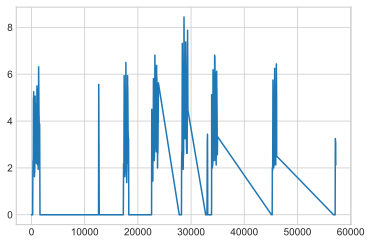

In [52]:
lightcurve=pyfits.open('/Volumes/Seagate_Backup_Plus_Drive_Lvb/RX_J0806/nicer/curve02.lc')
lightcurve.info()
time=lightcurve[1].data['TIME']
count1=lightcurve[1].data['RATE']
plt.plot(time,count1)
#plt.xlim(0,2000)

Filename: /Volumes/Seagate_Backup_Plus_Drive_Lvb/RX_J0806/nicer/curve03.lc
No.    Name         Type      Cards   Dimensions   Format
0    PRIMARY     PrimaryHDU      36   ()              
1    RATE        BinTableHDU    310   732R x 4C    [D, E, E, E]   
2    GTI         BinTableHDU     50   837R x 2C    [1D, 1D]   


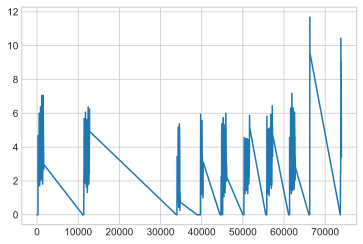

In [51]:
lightcurve=pyfits.open('/Volumes/Seagate_Backup_Plus_Drive_Lvb/RX_J0806/nicer/curve03.lc')
lightcurve.info()
time=lightcurve[1].data['TIME']
count1=lightcurve[1].data['RATE']
plt.plot(time,count1)
#plt.xlim(0,2000)

Filename: /Volumes/Seagate_Backup_Plus_Drive_Lvb/RX_J0806/nicer/curve04.lc
No.    Name         Type      Cards   Dimensions   Format
0    PRIMARY     PrimaryHDU      36   ()              
1    RATE        BinTableHDU    310   186R x 4C    [D, E, E, E]   
2    GTI         BinTableHDU     50   18R x 2C     [1D, 1D]   


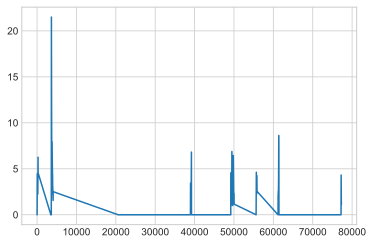

In [55]:
lightcurve=pyfits.open('/Volumes/Seagate_Backup_Plus_Drive_Lvb/RX_J0806/nicer/curve04.lc')
lightcurve.info()
time=lightcurve[1].data['TIME']
count1=lightcurve[1].data['RATE']
plt.plot(time,count1)
#plt.xlim(0,2000)

Filename: /Volumes/Seagate_Backup_Plus_Drive_Lvb/RX_J0806/nicer/curve05.lc
No.    Name         Type      Cards   Dimensions   Format
0    PRIMARY     PrimaryHDU      36   ()              
1    RATE        BinTableHDU    310   287R x 4C    [D, E, E, E]   
2    GTI         BinTableHDU     50   17R x 2C     [1D, 1D]   


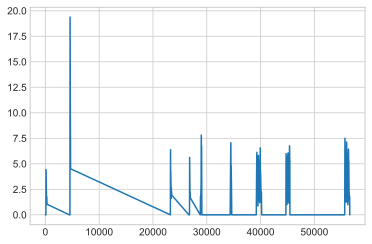

In [57]:
lightcurve=pyfits.open('/Volumes/Seagate_Backup_Plus_Drive_Lvb/RX_J0806/nicer/curve05.lc')
lightcurve.info()
time=lightcurve[1].data['TIME']
count1=lightcurve[1].data['RATE']
plt.plot(time,count1)
#plt.xlim(0,2000)

Filename: /Volumes/Seagate_Backup_Plus_Drive_Lvb/RX_J0806/nicer/curve06.lc
No.    Name         Type      Cards   Dimensions   Format
0    PRIMARY     PrimaryHDU      36   ()              
1    RATE        BinTableHDU    310   210R x 4C    [D, E, E, E]   
2    GTI         BinTableHDU     50   8R x 2C      [1D, 1D]   


(0, 20000)

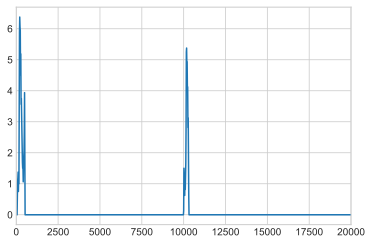

In [62]:
lightcurve=pyfits.open('/Volumes/Seagate_Backup_Plus_Drive_Lvb/RX_J0806/nicer/curve06.lc')
lightcurve.info()
time=lightcurve[1].data['TIME']
count1=lightcurve[1].data['RATE']
plt.plot(time,count1)
plt.xlim(0,20000)

In [156]:
lightcurve=pyfits.open('/Volumes/Seagate_Backup_Plus_Drive_Lvb/RX_J0806/nicer/curve01.lc')
barylc=pyfits.open('/Volumes/Seagate_Backup_Plus_Drive_Lvb/RX_J0806/nicer/bary01.lc')


header=lightcurve[0].header
baryheader=barylc[0].header


In [163]:
print('originlc:')
print(repr(header[:]),'\n')
print('baryedlc:')
print(repr(baryheader[:]))

originlc:
SIMPLE  =                    T / file does conform to FITS standard             
BITPIX  =                   32 / number of bits per data pixel                  
NAXIS   =                    0 / number of data axes                            
EXTEND  =                    T / FITS dataset may contain extensions            
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
TELESCOP= 'NICER   '           / Telescope (mission) name                       
DATAMODE= 'PHOTON  '           / Datamode                                       
DETNAM  = 'NONE    '           / Detector                                       
INSTRUME= 'XTI     '           / Instrument name                                
OBJECT  = 'HM_CnC  '           / Name of observed object                        
ONTIME  = 1.037972461019456E+04 / On-source time                                
EXPOSURE= 1.037972

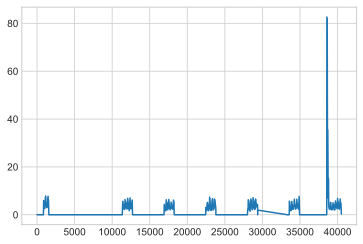

In [165]:
time=lightcurve[1].data['TIME']
count=lightcurve[1].data['RATE']
plt.plot(time,count)
#plt.xlim(0,2000)
#plt.savefig('curve07.png')
#plt.savefig('curve07_tot.png')

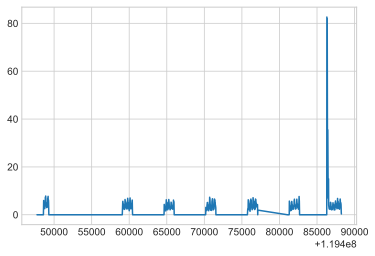

In [166]:
barytime=barylc[1].data['TIME']
barycount=barylc[1].data['RATE']
plt.plot(barytime,barycount)

In [168]:
time[0],time[1],time[2],
barytime[0],barytime[1],barytime[2],

(119447730.2288681, 119447938.25153556, 119447954.25324658)

119447938.252 119447954.253 119447970.255 
 0.0 0.0 0.0 664


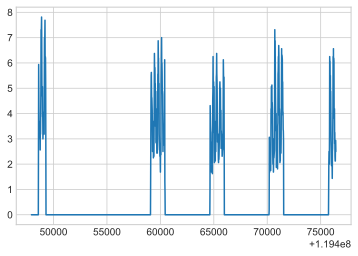

In [184]:
t =barytime[1:]
y = barycount[1:]
print(t[0],t[1],t[2],'\n',y[0],y[1],y[2],t.size)
rangenum=400
plt.plot(t[:rangenum],y[:rangenum])

/Users/brettlv/anaconda3/lib/python3.6/site-packages/astropy/stats/lombscargle/implementations/fast_impl.py:93: RuntimeWarning: invalid value encountered in true_divide
  tan_2omega_tau = (S2 - 2 * S * C) / (C2 - (C * C - S * S))


 (0.001, 0.004),

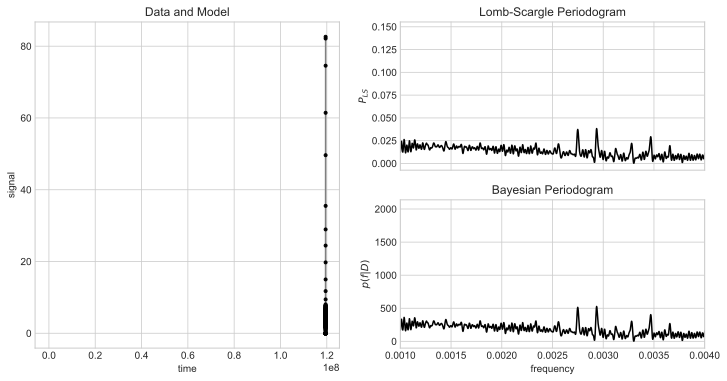

In [195]:
fig = plt.figure(figsize=(12, 6))
gs = plt.GridSpec(2, 2)


t =barytime[1:]
y = barycount[1:]


ax = fig.add_subplot(gs[:, 0])
ax.errorbar(t, y, fmt='ok', ecolor='gray',
            markersize=3, capsize=0)

ax.plot(t, y, 0, '-k', color='gray')
ax.set(xlabel='time',
       ylabel='signal',
       title='Data and Model')

ls = LombScargle(t, y)
freq, power = ls.autopower(normalization='standard',
                           minimum_frequency=0,
                           maximum_frequency=1e-1,
                           samples_per_peak=10)
freq, p = ls.autopower(normalization='psd',
                       minimum_frequency=0,
                       maximum_frequency=1e-1,
                       samples_per_peak=10)
#p = np.exp(p)

ax = [fig.add_subplot(gs[0, 1]),
      fig.add_subplot(gs[1, 1])]
ax[0].plot(freq, power, '-k')
ax[0].set(xlim=(1e-3, 4e-3),
          ylabel='$P_{LS}$',
          title='Lomb-Scargle Periodogram')
ax[0].xaxis.set_major_formatter(plt.NullFormatter())

ax[1].plot(freq, p, '-k')
ax[1].set(xlim=(1e-3,4e-3),
          xlabel='frequency',
          ylabel='$p(f|D)$',
          title='Bayesian Periodogram')

#plt.savefig('curve07_period_partial.png')

(0.002, 0.004)

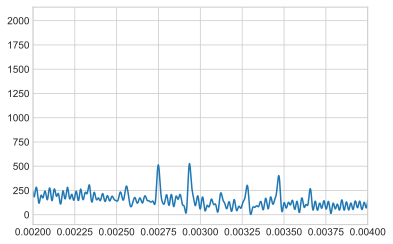

In [197]:
plt.plot(freq,p)
plt.xlim(2e-3,4e-3)

In [198]:
freq.size

40309

In [193]:
rangeleft=int(freq.size

40309

In [192]:
p_range=p[1550:1650]
freq_range=freq[1550:1650]
frequency=freq_range[np.argmax(p_range)]
T=1/frequency
print(frequency,T)

0.0 inf


/Users/brettlv/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:3: RuntimeWarning: divide by zero encountered in double_scalars
  app.launch_new_instance()


/Users/brettlv/anaconda3/lib/python3.6/site-packages/astropy/stats/lombscargle/implementations/fast_impl.py:93: RuntimeWarning: invalid value encountered in true_divide
  tan_2omega_tau = (S2 - 2 * S * C) / (C2 - (C * C - S * S))


 (0.001, 0.01),

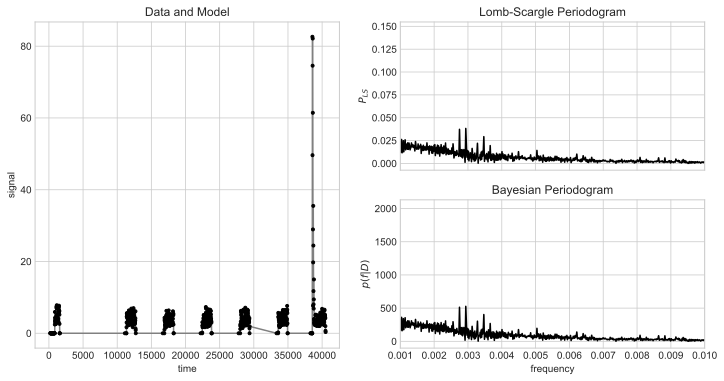

In [172]:
fig = plt.figure(figsize=(12, 6))
gs = plt.GridSpec(2, 2)


t =time[1:]
y = count1[1:]


ax = fig.add_subplot(gs[:, 0])
ax.errorbar(t, y, fmt='ok', ecolor='gray',
            markersize=3, capsize=0)

ax.plot(t, y,0, '-k', color='gray')
ax.set(xlabel='time',
       ylabel='signal',
       title='Data and Model')

ls = LombScargle(t, y)
freq, power = ls.autopower(normalization='standard',
                           minimum_frequency=0,
                           maximum_frequency=1e-1,
                           samples_per_peak=10)
freq, p = ls.autopower(normalization='psd',
                       minimum_frequency=0,
                       maximum_frequency=1e-1,
                       samples_per_peak=10)
#p = np.exp(p)

ax = [fig.add_subplot(gs[0, 1]),
      fig.add_subplot(gs[1, 1])]
ax[0].plot(freq, power, '-k')
ax[0].set(xlim=(1e-3, 1e-2),
          ylabel='$P_{LS}$',
          title='Lomb-Scargle Periodogram')
ax[0].xaxis.set_major_formatter(plt.NullFormatter())

ax[1].plot(freq, p, '-k')
ax[1].set(xlim=(1e-3, 1e-2),
          xlabel='frequency',
          ylabel='$p(f|D)$',
          title='Bayesian Periodogram')

#plt.savefig('curve07.png')

In [174]:
p_range=p[1550:1650]
freq_range=freq[1550:1650]
frequency=freq_range[np.argmax(p_range)]
T=1/frequency
print(frequency,T)

0.0040066531499 249.584868614
